# Hepatitis Survival Prediction

+ Feature Selection
+ Data Exploration
+ Plotting 
+ Build Model
+ Interpret and Evaluate
+ Confusion Metrics
+ Productionize
+ Deployment

## Importing necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas_profiling
import sweetviz
import seaborn as sns

In [2]:
data = pd.read_csv("hepatitis.csv")

---

---

## 1. Feature Selection

- #### SelectKBest
    - Used to select the features that are strongly corelated to output 
    
- #### Recursive Feature Elimination
    - Used to eliminate the features that are not useful
    
- #### ExtraTreesClassifier
    - Used to select the important features

In [3]:
data.tail()

class  age  sex  steroid  antivirals  fatigue  malaise  anorexia  \
150      1   46    1        2           2        1        1         1   
151      2   44    1        2           2        1        2         2   
152      2   61    1        1           2        1        1         2   
153      2   53    2        1           2        1        2         2   
154      1   43    1        2           2        1        2         2   

     liver_big  liver_firm  spleen_palpable  spiders  ascites  varices  \
150          2           2                2        1        1        1   
151          2           1                2        2        2        2   
152          1           1                2        1        2        2   
153          2           2                1        1        2        1   
154          2           2                1        1        1        2   

     bilirubin  alk_phosphate  sgot  albumin  protime  histology  
150        7.6              0   242      3.3       50          2  
151        0.9            126   142      4.3        0          2  
152        0.8             75    20      4.1        0          2  
153        1.5             81    19      4.1       48          2  
154        1.2            100    19      3.1       42          2

<h3 style="color:red">Warning</h3>
<br>
   Dont run below cell twice<br>
   If you have run twice, restart kernel and rerun the code from first cell

In [4]:
"""
making 2 as 1 and 1 as 0 of class column
"""
class_map={1:0, 2:1}
data["class"] = data["class"].map(class_map)

In [5]:
"""
we have to predict class

class 0 --- Dead
class 1 --- Survived

"""
data.head()

class  age  sex  steroid  antivirals  fatigue  malaise  anorexia  \
0      1   30    2        1           2        2        2         2   
1      1   50    1        1           2        1        2         2   
2      1   78    1        2           2        1        2         2   
3      1   31    1        0           1        2        2         2   
4      1   34    1        2           2        2        2         2   

   liver_big  liver_firm  spleen_palpable  spiders  ascites  varices  \
0          1           2                2        2        2        2   
1          1           2                2        2        2        2   
2          2           2                2        2        2        2   
3          2           2                2        2        2        2   
4          2           2                2        2        2        2   

   bilirubin  alk_phosphate  sgot  albumin  protime  histology  
0        1.0             85    18      4.0        0          1  
1        0.9            135    42      3.5        0          1  
2        0.7             96    32      4.0        0          1  
3        0.7             46    52      4.0       80          1  
4        1.0              0   200      4.0        0          1

In [6]:
data.isnull().sum()

class              0
age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver_big          0
liver_firm         0
spleen_palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk_phosphate      0
sgot               0
albumin            0
protime            0
histology          0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   class            155 non-null    int64  
 1   age              155 non-null    int64  
 2   sex              155 non-null    int64  
 3   steroid          155 non-null    int64  
 4   antivirals       155 non-null    int64  
 5   fatigue          155 non-null    int64  
 6   malaise          155 non-null    int64  
 7   anorexia         155 non-null    int64  
 8   liver_big        155 non-null    int64  
 9   liver_firm       155 non-null    int64  
 10  spleen_palpable  155 non-null    int64  
 11  spiders          155 non-null    int64  
 12  ascites          155 non-null    int64  
 13  varices          155 non-null    int64  
 14  bilirubin        155 non-null    float64
 15  alk_phosphate    155 non-null    int64  
 16  sgot             155 non-null    int64  
 17  albumin         

In [8]:
data.describe()

class         age         sex     steroid  antivirals     fatigue  \
count  155.000000  155.000000  155.000000  155.000000  155.000000  155.000000   
mean     0.793548   41.200000    1.103226    1.496774    1.845161    1.341935   
std      0.406070   12.565878    0.305240    0.514393    0.362923    0.489350   
min      0.000000    7.000000    1.000000    0.000000    1.000000    0.000000   
25%      1.000000   32.000000    1.000000    1.000000    2.000000    1.000000   
50%      1.000000   39.000000    1.000000    2.000000    2.000000    1.000000   
75%      1.000000   50.000000    1.000000    2.000000    2.000000    2.000000   
max      1.000000   78.000000    2.000000    2.000000    2.000000    2.000000   

          malaise    anorexia   liver_big  liver_firm  spleen_palpable  \
count  155.000000  155.000000  155.000000  155.000000       155.000000   
mean     1.593548    1.780645    1.709677    1.470968         1.741935   
std      0.505769    0.430508    0.580727    0.627401         0.507588   
min      0.000000    0.000000    0.000000    0.000000         0.000000   
25%      1.000000    2.000000    2.000000    1.000000         2.000000   
50%      2.000000    2.000000    2.000000    2.000000         2.000000   
75%      2.000000    2.000000    2.000000    2.000000         2.000000   
max      2.000000    2.000000    2.000000    2.000000         2.000000   

          spiders     ascites     varices   bilirubin  alk_phosphate  \
count  155.000000  155.000000  155.000000  155.000000     155.000000   
mean     1.606452    1.806452    1.819355    1.372258      85.619355   
std      0.552406    0.471207    0.462503    1.219992      62.061686   
min      0.000000    0.000000    0.000000    0.000000       0.000000   
25%      1.000000    2.000000    2.000000    0.700000      51.000000   
50%      2.000000    2.000000    2.000000    1.000000      84.000000   
75%      2.000000    2.000000    2.000000    1.500000     119.500000   
max      2.000000    2.000000    2.000000    8.000000     295.000000   

             sgot     albumin     protime   histology  
count  155.000000  155.000000  155.000000  155.000000  
mean    83.677419    3.423226   35.116129    1.451613  
std     89.527688    1.318343   35.221923    0.499266  
min      0.000000    0.000000    0.000000    1.000000  
25%     30.500000    3.050000    0.000000    1.000000  
50%     55.000000    3.900000   35.000000    1.000000  
75%     99.000000    4.200000   65.000000    2.000000  
max    648.000000    6.400000  100.000000    2.000000

In [9]:
"""
Using SelectKBest
"""

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [10]:
"""
Selecting X and y from the dataset
"""

cols = data.columns.to_list()
cols

['class',
 'age',
 'sex',
 'steroid',
 'antivirals',
 'fatigue',
 'malaise',
 'anorexia',
 'liver_big',
 'liver_firm',
 'spleen_palpable',
 'spiders',
 'ascites',
 'varices',
 'bilirubin',
 'alk_phosphate',
 'sgot',
 'albumin',
 'protime',
 'histology']

In [11]:
X_col = cols[1:]
y_col = cols[0]

In [12]:
print(X_col)  # Columns of X
print()
print(y_col) # Columns of y

['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime', 'histology']

class


In [13]:
X = data[X_col]
y = data[y_col]

In [14]:
# Using SelectKBest
skb = SelectKBest(score_func=chi2, k=10) # Selecting features according to 10 highest scores

best_features = skb.fit(X,y)

In [15]:
best_features.scores_

array([ 28.47481919,   0.38948319,   0.3995129 ,   0.18634161,
         2.34643234,   2.46803203,   0.19648065,   0.31698209,
         0.9867095 ,   0.74535155,   3.18940804,   2.09639954,
         1.12812176,  30.10247172,  17.88270548,  47.38820795,
         6.87318606, 130.18332457,   3.01854675])

In [16]:
"""
Creating DataFrame from scores
"""

scores = pd.DataFrame(best_features.scores_, columns=["Best Scores"])

In [17]:
scores

Best Scores
0     28.474819
1      0.389483
2      0.399513
3      0.186342
4      2.346432
5      2.468032
6      0.196481
7      0.316982
8      0.986710
9      0.745352
10     3.189408
11     2.096400
12     1.128122
13    30.102472
14    17.882705
15    47.388208
16     6.873186
17   130.183325
18     3.018547

In [18]:
"""
Getting the columns name
"""

data_columns_name = pd.DataFrame(X.columns, columns=["Columns Name"])
data_columns_name

Columns Name
0               age
1               sex
2           steroid
3        antivirals
4           fatigue
5           malaise
6          anorexia
7         liver_big
8        liver_firm
9   spleen_palpable
10          spiders
11          ascites
12          varices
13        bilirubin
14    alk_phosphate
15             sgot
16          albumin
17          protime
18        histology

In [19]:
columns_scores = pd.concat([data_columns_name, scores], axis=1)

In [20]:
columns_scores

Columns Name  Best Scores
0               age    28.474819
1               sex     0.389483
2           steroid     0.399513
3        antivirals     0.186342
4           fatigue     2.346432
5           malaise     2.468032
6          anorexia     0.196481
7         liver_big     0.316982
8        liver_firm     0.986710
9   spleen_palpable     0.745352
10          spiders     3.189408
11          ascites     2.096400
12          varices     1.128122
13        bilirubin    30.102472
14    alk_phosphate    17.882705
15             sgot    47.388208
16          albumin     6.873186
17          protime   130.183325
18        histology     3.018547

#### Note
- We have to find the columns that have the highest scores
- The columns that have highest scores will be the most important columns

In [21]:
"""
Sorting the dataframe by descending order according to 'Best Scores' column
"""
columns_scores.sort_values(by='Best Scores',ascending=False,inplace=True)
columns_scores

Columns Name  Best Scores
17          protime   130.183325
15             sgot    47.388208
13        bilirubin    30.102472
0               age    28.474819
14    alk_phosphate    17.882705
16          albumin     6.873186
10          spiders     3.189408
18        histology     3.018547
5           malaise     2.468032
4           fatigue     2.346432
11          ascites     2.096400
12          varices     1.128122
8        liver_firm     0.986710
9   spleen_palpable     0.745352
2           steroid     0.399513
1               sex     0.389483
7         liver_big     0.316982
6          anorexia     0.196481
3        antivirals     0.186342

### Note
- protime is the most important feature of them all
- antivirals is not that important

In [22]:
"""
Finding the top features that have scores greater than 2
"""
column_scores_new = columns_scores[columns_scores["Best Scores"].values>2.3]

In [23]:
column_scores_new  #Most important features

Columns Name  Best Scores
17        protime   130.183325
15           sgot    47.388208
13      bilirubin    30.102472
0             age    28.474819
14  alk_phosphate    17.882705
16        albumin     6.873186
10        spiders     3.189408
18      histology     3.018547
5         malaise     2.468032
4         fatigue     2.346432

### Optional Methods for Feature Selection

+ Recursive Feature Elimination (RFE)
+ ExtraTreeClassifier

### ** Note **
- These are completely optional methods to select important features

#### RFE

In [24]:
from warnings import filterwarnings
filterwarnings(action="ignore")

In [25]:
"""
RFE
"""
from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression
lr =LogisticRegression()
rfe = RFE(lr,8)
rfe.fit(X,y)

RFE(estimator=LogisticRegression(), n_features_to_select=8)

In [26]:
rfe.ranking_

array([ 9,  1,  5,  8,  1,  1,  1,  4,  6,  7,  1,  2,  3,  1, 11, 10,  1,
       12,  1])

In [27]:
rfe.support_

array([False,  True, False, False,  True,  True,  True, False, False,
       False,  True, False, False,  True, False, False,  True, False,
        True])

In [28]:
rfe_rankings = pd.DataFrame({"RFE Ranking": rfe.ranking_, "RFE Support": rfe.support_})

In [29]:
rfe_data = pd.concat([data_columns_name, rfe_rankings], axis=1)

In [30]:
rfe_data

Columns Name  RFE Ranking  RFE Support
0               age            9        False
1               sex            1         True
2           steroid            5        False
3        antivirals            8        False
4           fatigue            1         True
5           malaise            1         True
6          anorexia            1         True
7         liver_big            4        False
8        liver_firm            6        False
9   spleen_palpable            7        False
10          spiders            1         True
11          ascites            2        False
12          varices            3        False
13        bilirubin            1         True
14    alk_phosphate           11        False
15             sgot           10        False
16          albumin            1         True
17          protime           12        False
18        histology            1         True

In [31]:
"""
Sorting the dataframe according to highest ranking, False Support

Highest Ranking -- Highest Priority

"""

rfe_data.sort_values(by="RFE Ranking", ascending=False, inplace=True)
rfe_data.nlargest(12,"RFE Ranking")

Columns Name  RFE Ranking  RFE Support
17          protime           12        False
14    alk_phosphate           11        False
15             sgot           10        False
0               age            9        False
3        antivirals            8        False
9   spleen_palpable            7        False
8        liver_firm            6        False
2           steroid            5        False
7         liver_big            4        False
12          varices            3        False
11          ascites            2        False
6          anorexia            1         True

#### Another Optional Method

In [32]:
"""
Extra Tree Classifier for checking importance of features
"""
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(X,y)

ExtraTreesClassifier()

In [33]:
etc.feature_importances_

array([0.05600577, 0.02480646, 0.03215816, 0.01006917, 0.02915989,
       0.04764847, 0.0255192 , 0.04282397, 0.04740218, 0.04081664,
       0.07038681, 0.09523172, 0.05815698, 0.1057845 , 0.07154986,
       0.04552688, 0.07772403, 0.05761349, 0.06161582])

In [34]:
etc_imp_data = pd.DataFrame(etc.feature_importances_, columns=['Important Features'])

In [35]:
etc_imp_data

Important Features
0             0.056006
1             0.024806
2             0.032158
3             0.010069
4             0.029160
5             0.047648
6             0.025519
7             0.042824
8             0.047402
9             0.040817
10            0.070387
11            0.095232
12            0.058157
13            0.105785
14            0.071550
15            0.045527
16            0.077724
17            0.057613
18            0.061616

In [36]:
etc_data = pd.concat([data_columns_name, etc_imp_data], axis=1)

In [37]:
etc_data.sort_values(by='Important Features', inplace=True, ascending=False)

In [38]:
etc_data.head(12)  #Selecting 12 best features

Columns Name  Important Features
13      bilirubin            0.105785
11        ascites            0.095232
16        albumin            0.077724
14  alk_phosphate            0.071550
10        spiders            0.070387
18      histology            0.061616
12        varices            0.058157
17        protime            0.057613
0             age            0.056006
5         malaise            0.047648
8      liver_firm            0.047402
15           sgot            0.045527

In [39]:
etc_data.head(12).plot(kind='bar')

In [40]:
plt.figure(figsize=(20,18))
sns.heatmap(X.corr(), annot=True)  #Corelation

### Selecting the important features and removing the unnecessary ones

In [41]:
data_cols = list(column_scores_new["Columns Name"].values)

In [42]:
data_cols  ### These are important features

['protime',
 'sgot',
 'bilirubin',
 'age',
 'alk_phosphate',
 'albumin',
 'spiders',
 'histology',
 'malaise',
 'fatigue']

---

---

## 2. Data Exploration, Analysis and Plotting

### Sweetviz Report
- Used for Data Visualization

In [ ]:
"""
Go to directory to see the entire report in HTML
"""

EDAreport = sweetviz.analyze(data)
EDAreport.show_html()

----

### Pandas Profiling

In [ ]:
"""
Useful tool for EDA
You can also check the html file in directory 
"""
pandas_profile = pandas_profiling.ProfileReport(data)
pandas_profile.to_widgets()

In [ ]:
pandas_profile.to_file("Pandas Profiling.html") # Generates the HTML file in the working directory

In [43]:
print(data.shape)
print(data.size)

(155, 20)
3100


In [44]:
# As seen above, there are no null values

In [45]:
data.dtypes

class                int64
age                  int64
sex                  int64
steroid              int64
antivirals           int64
fatigue              int64
malaise              int64
anorexia             int64
liver_big            int64
liver_firm           int64
spleen_palpable      int64
spiders              int64
ascites              int64
varices              int64
bilirubin          float64
alk_phosphate        int64
sgot                 int64
albumin            float64
protime              int64
histology            int64
dtype: object

In [46]:
data["sex"].value_counts()
# male - 1
# female - 2

1    139
2     16
Name: sex, dtype: int64

In [47]:
data["class"].value_counts()
# Survival as 1
# Dead as 0

1    123
0     32
Name: class, dtype: int64

Text(0, 0.5, 'Count')

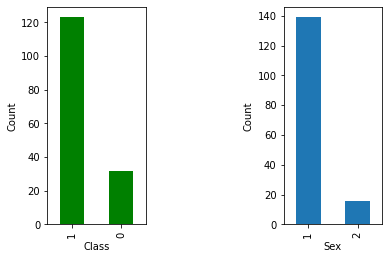

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(1,3,1)  #subplot(row,col,position)
data["class"].value_counts().plot(kind="bar", color="g")
plt.xlabel("Class")
plt.ylabel("Count")

plt.subplot(1,3,3)
data["sex"].value_counts().plot(kind="bar")
plt.xlabel("Sex")
plt.ylabel("Count")

In [49]:
print(data["age"].min())
print(data["age"].max())

7
78


----

### Setting cumulative frequency for different age group

In [50]:
labels=["0-10","10-20",'20-30','30-40','40-50','50-60','60-70','70+']
bins=[0,10,20,30,40,50,60,70,80]
age_freq = data.groupby(pd.cut(data['age'], bins=bins, labels=labels)).size()

In [51]:
age_freq

age
0-10      1
10-20     3
20-30    29
30-40    50
40-50    35
50-60    24
60-70    11
70+       2
dtype: int64

In [52]:
age_freq.reset_index(name="count")

age  count
0   0-10      1
1  10-20      3
2  20-30     29
3  30-40     50
4  40-50     35
5  50-60     24
6  60-70     11
7    70+      2

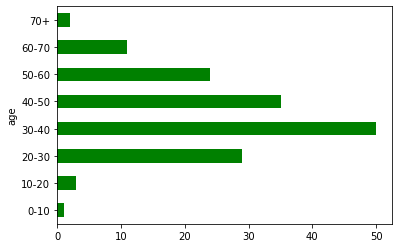

In [53]:
age_freq.plot(kind="barh",color="green")  #Age 30-40 is affected more by hepatitis

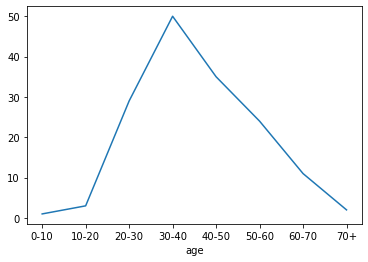

In [54]:
age_freq.plot(kind="line")

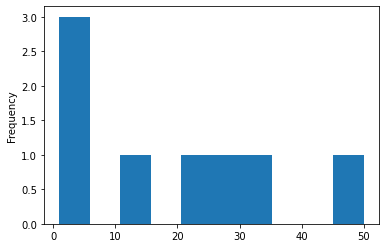

In [55]:
age_freq.plot(kind="hist")

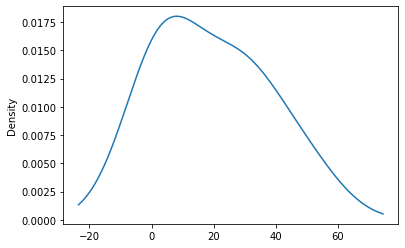

In [56]:
age_freq.plot(kind="kde")

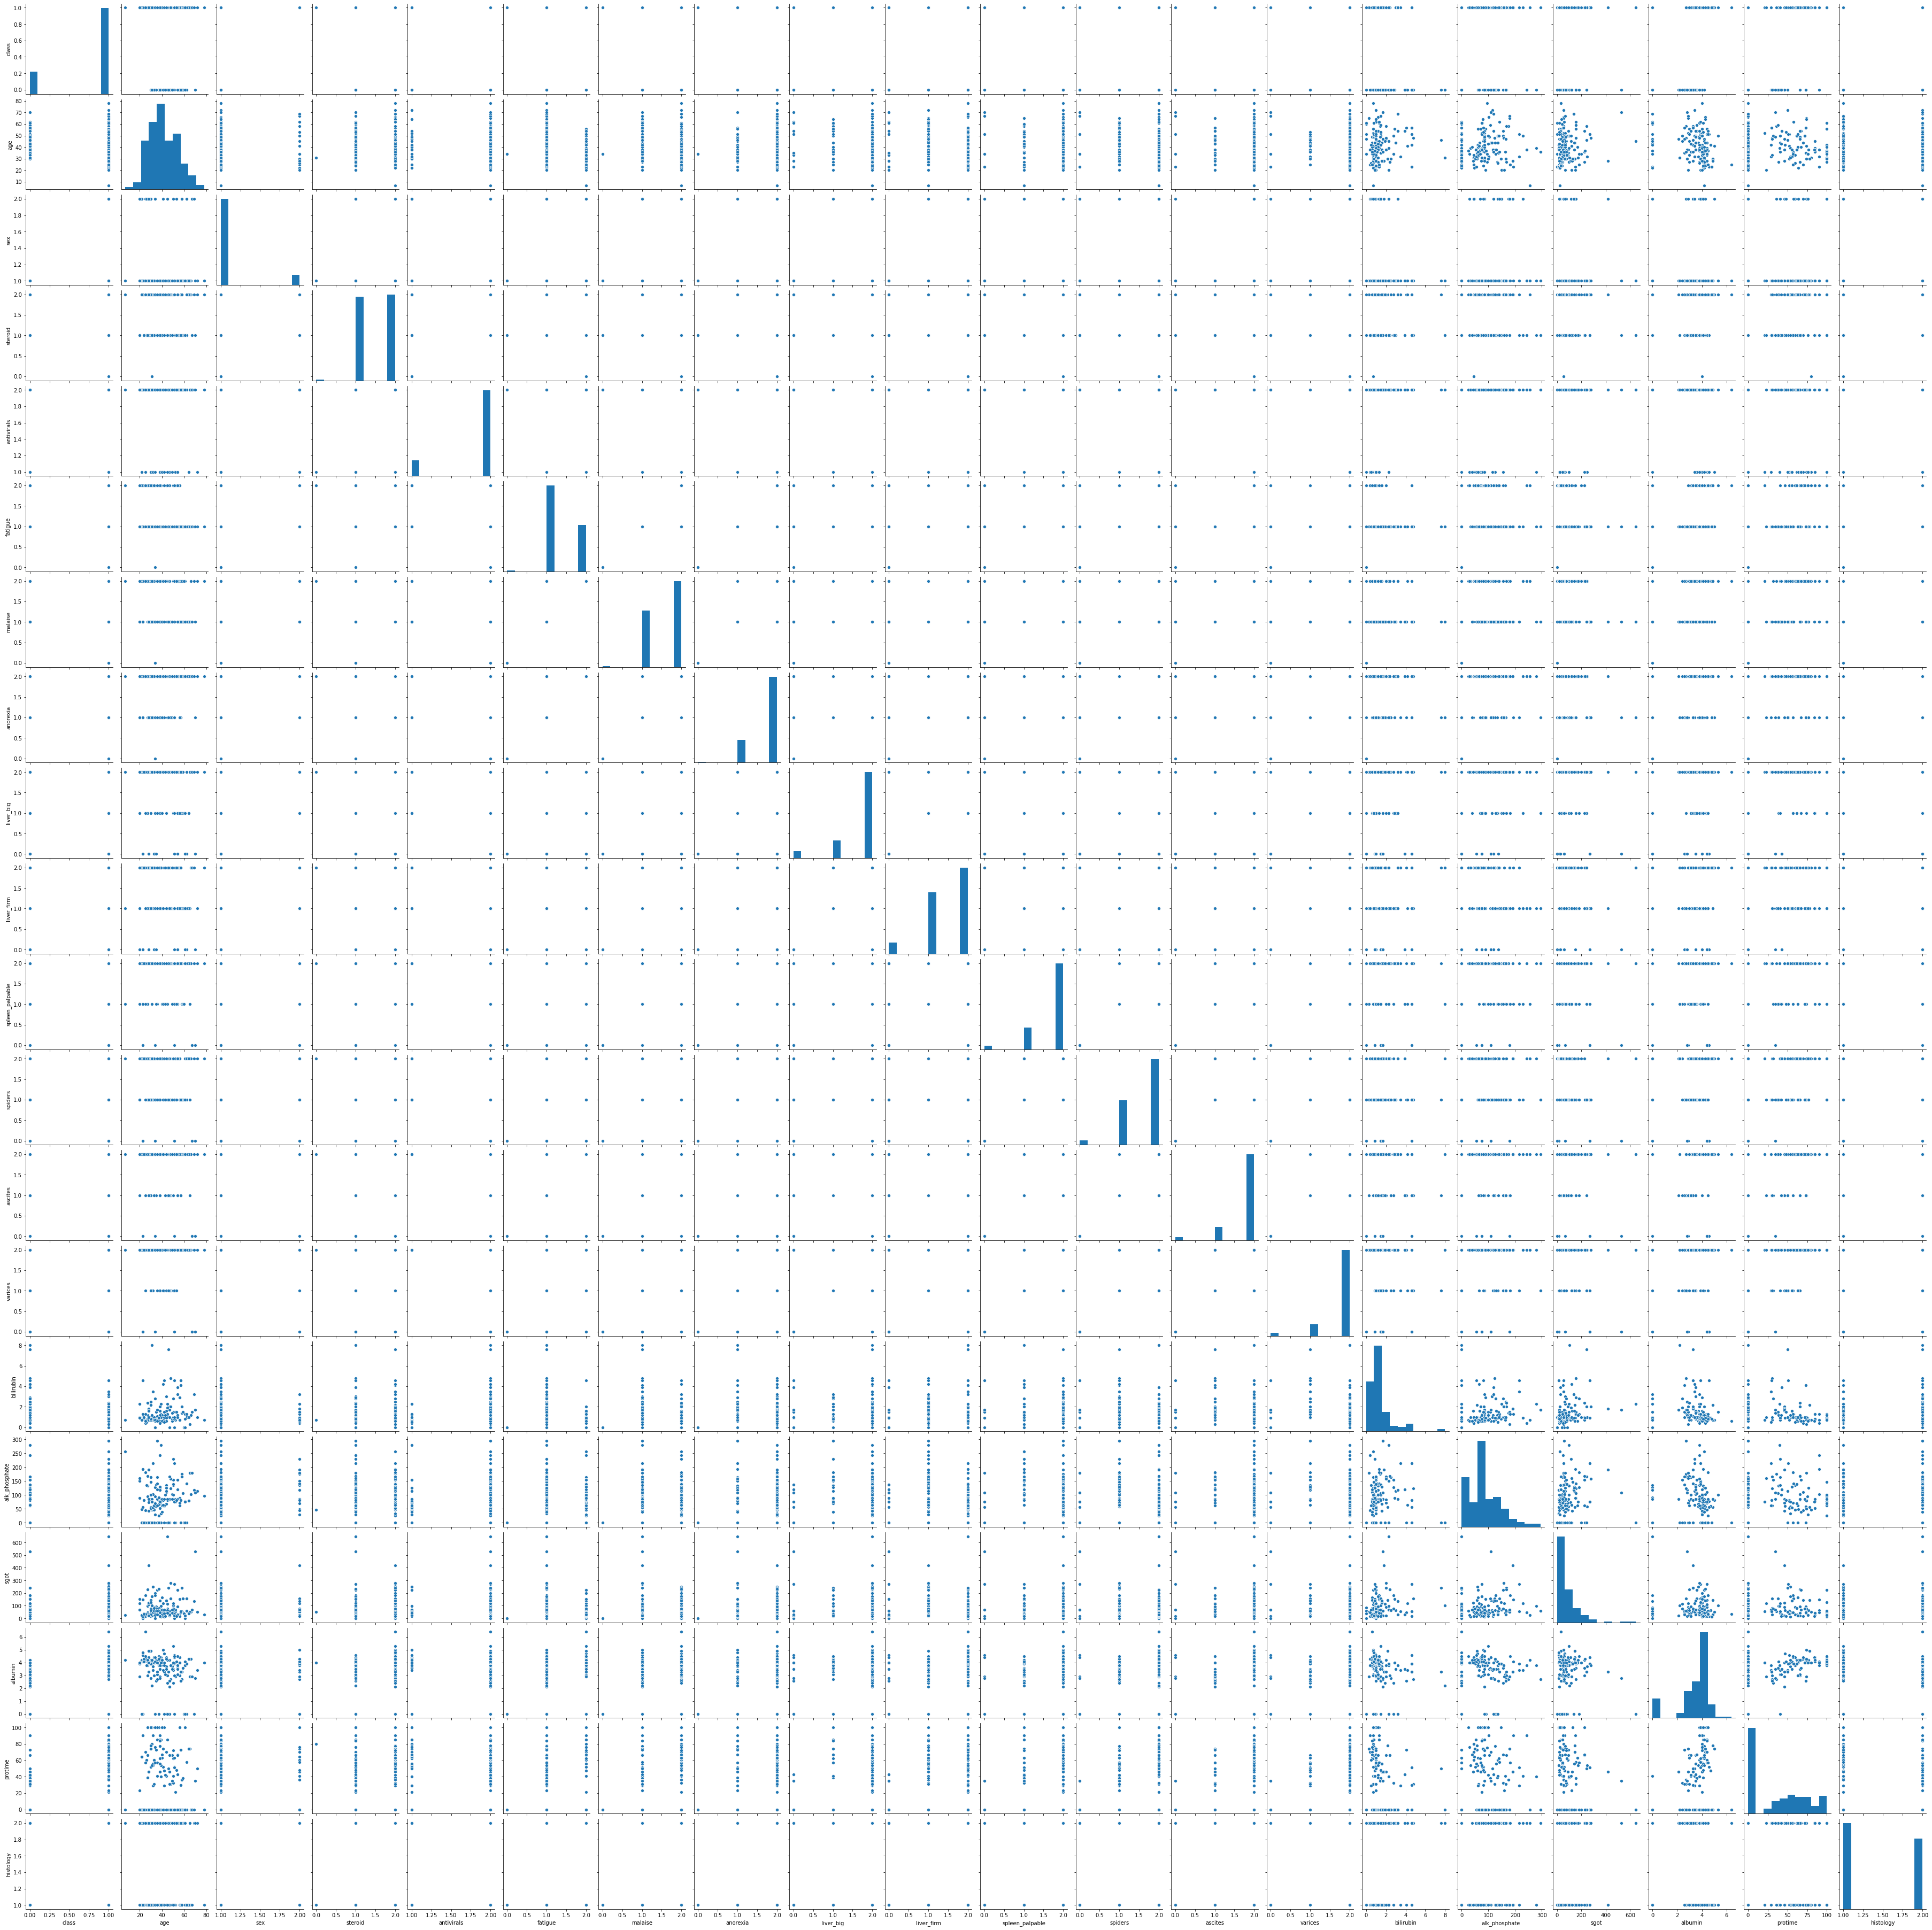

In [57]:
sns.pairplot(data)

----

### Univariate Analysis and Multivariate Analysis
 - Analysis using box plot and scatter plot 
 + Outlier Detection

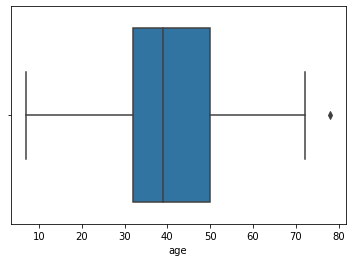

In [58]:
#Box plot for univariate feature, outlier detection
sns.boxplot(data["age"])

### From figure above:

+ Outlier is at around 80 years of age
+ We have to remove the outlier by eliminatiing it
+ But first find out all other outliers

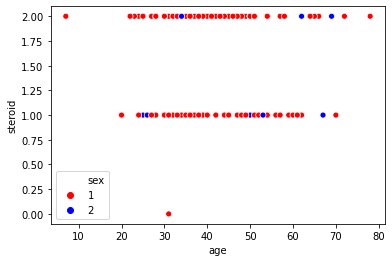

In [59]:
sns.scatterplot(data["age"], data["steroid"], hue=data["sex"],palette=["red","blue"])


### Insight
- Male takes more steroid than females 

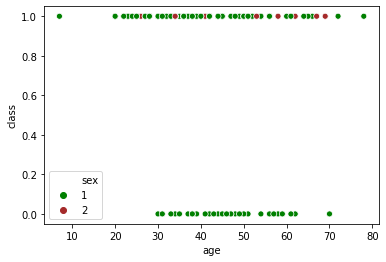

In [60]:
sns.scatterplot(data["age"], data["class"], hue=data["sex"], palette=["green",'brown'])

### Insight

+ Age 30-60 died mostly from hepatitis
+ Age 10-30 and 60 above mostly survived
+ Most of the died person are male

### Local Outlier Factor 
- For Outlier Detection


In [61]:
data_cols.append("sex") #Sex column is also important 

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
X_new_data = data[data_cols]
y_new_data = data['class']
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_new_data, y_new_data, random_state=8, test_size=0.25)
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train_o) 
out_indx = yhat==-1  #-1 for outlier, 1 for not outlier
o_i=[]
for i in range(len(out_indx)):
    if out_indx[i] == True:
        o_i.append(i)
print(yhat)
print(o_i)
print(list(X_train_o.iloc[o_i,:].index))
outliers_iso = X_train_o.iloc[o_i,:].index

[-1  1 -1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1 -1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1  1 -1]
[0, 2, 5, 21, 43, 60, 64, 79, 87, 105, 111, 115]
[67, 33, 41, 150, 6, 147, 47, 107, 153, 115, 83, 84]


In [63]:
data_out_comb = pd.concat([X_train_o, y_train_o], axis=1)
data_out_comb

protime  sgot  bilirubin  age  alk_phosphate  albumin  spiders  \
67        73    48        4.1   57              0      2.6        1   
138       31    30        1.0   47            166      2.6        1   
33        60    29        0.5   26            135      3.8        2   
123        0   231        0.9   37              0      4.3        1   
114        0    75        1.1   36            141      3.3        2   
..       ...   ...        ...  ...            ...      ...      ...   
83         0    69        1.5   67            179      2.9        0   
136        0    33        0.8   51              0      4.5        1   
133       50    52        1.0   72            115      3.4        2   
105        0    34        0.6   25              0      6.4        2   
84        58   156        1.3   62            141      3.9        1   

     histology  malaise  fatigue  sex  class  
67           1        1        1    1      0  
138          2        1        1    1      0  
33           1        2        2    2      1  
123          2        2        1    1      1  
114          2        2        2    1      1  
..         ...      ...      ...  ...    ...  
83           1        1        1    2      1  
136          2        2        2    1      1  
133          2        2        1    1      1  
105          2        2        2    1      1  
84           1        1        1    2      1  

[116 rows x 12 columns]

In [64]:
"""
Dropping the rows that are outliers
"""
data_out_comb.drop(outliers_iso, axis=0, inplace=True)
data_out_comb

protime  sgot  bilirubin  age  alk_phosphate  albumin  spiders  \
138       31    30        1.0   47            166      2.6        1   
123        0   231        0.9   37              0      4.3        1   
114        0    75        1.1   36            141      3.3        2   
119        0    28        3.2   54             85      3.8        2   
113        0    65        1.2   45             81      3.0        2   
..       ...   ...        ...  ...            ...      ...      ...   
48        85    44        0.8   36             85      4.2        2   
104       46    20        1.7   47             86      2.1        2   
136        0    33        0.8   51              0      4.5        1   
133       50    52        1.0   72            115      3.4        2   
105        0    34        0.6   25              0      6.4        2   

     histology  malaise  fatigue  sex  class  
138          2        1        1    1      0  
123          2        2        1    1      1  
114          2        2        2    1      1  
119          2        2        1    1      1  
113          1        2        1    1      1  
..         ...      ...      ...  ...    ...  
48           1        2        2    1      1  
104          2        1        1    1      0  
136          2        2        2    1      1  
133          2        2        1    1      1  
105          2        2        2    1      1  

[104 rows x 12 columns]

---

### Optional

### Inter Quartile Range for multiple Outlier Detection

In [198]:
"""
Before removing outliers, lets make the new data that have only important features
"""
bst_x = data[data_cols]
bst_y = data['class']

In [199]:
bst_y = pd.DataFrame(data["class"], columns=["class"])
bst_y

class
0        1
1        1
2        1
3        1
4        1
..     ...
150      0
151      1
152      1
153      1
154      0

[155 rows x 1 columns]

### Important Note:
<h4 style="color: green"> Outlier detection must be done only on features columns not on target columns</h4>

In [200]:
new_data = bst_x
new_data.head()

protime  sgot  bilirubin  age  alk_phosphate  albumin  spiders  histology  \
0        0    18        1.0   30             85      4.0        2          1   
1        0    42        0.9   50            135      3.5        2          1   
2        0    32        0.7   78             96      4.0        2          1   
3       80    52        0.7   31             46      4.0        2          1   
4        0   200        1.0   34              0      4.0        2          1   

   malaise  fatigue  sex  
0        2        2    2  
1        2        1    1  
2        2        1    1  
3        2        2    1  
4        2        2    1

In [201]:
new_data.tail()

protime  sgot  bilirubin  age  alk_phosphate  albumin  spiders  \
150       50   242        7.6   46              0      3.3        1   
151        0   142        0.9   44            126      4.3        2   
152        0    20        0.8   61             75      4.1        1   
153       48    19        1.5   53             81      4.1        1   
154       42    19        1.2   43            100      3.1        1   

     histology  malaise  fatigue  sex  
150          2        1        1    1  
151          2        2        1    1  
152          2        1        1    1  
153          2        2        1    2  
154          2        2        1    1

In [202]:
"""
Now we will use IQR to detect multiple outlier from the dataset

The formula for IQR is Q3-Q1
So we have to calculate Q3 and Q1 first

Q1 - 25%
Q3 - 75%

"""

Q1 = new_data.quantile(0.25)
Q3 = new_data.quantile(0.75)
IQR = Q3-Q1
IQR

protime          65.00
sgot             68.50
bilirubin         0.80
age              18.00
alk_phosphate    68.50
albumin           1.15
spiders           1.00
histology         1.00
malaise           1.00
fatigue           1.00
sex               0.00
dtype: float64

### Insight

- Columns -- "age", "alk_phosphate", "sgot", "protime" have high values
- Above columns have maximum outliers

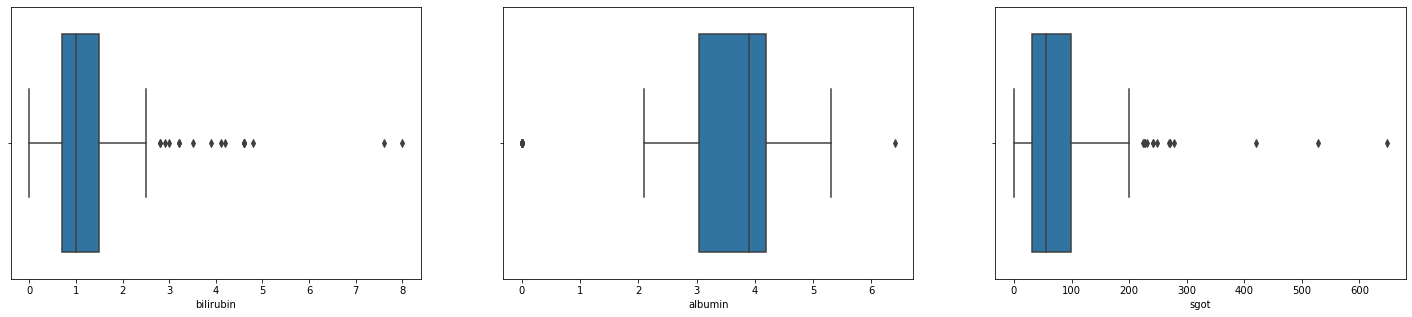

In [203]:
"""
Verifying the outliers by boxplot
"""
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
sns.boxplot(data['bilirubin'])

plt.subplot(1,3,2)
sns.boxplot(new_data['albumin'])

plt.subplot(1,3,3)
sns.boxplot(new_data["sgot"])

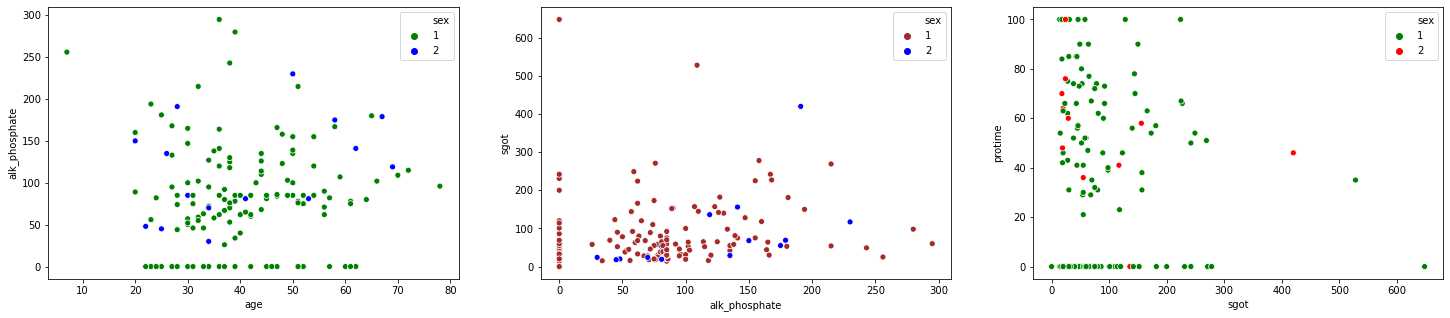

In [204]:
"""
Verifying outliers by Scatter plot based on gender
"""

plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
sns.scatterplot(new_data['age'], new_data['alk_phosphate'], hue=data['sex'], palette=["green",'blue'])

plt.subplot(1,3,2)
sns.scatterplot(new_data['alk_phosphate'], new_data['sgot'], hue=data['sex'], palette=["brown",'blue'])

plt.subplot(1,3,3)
sns.scatterplot(new_data["sgot"], new_data['protime'], hue=data['sex'], palette=["green",'red'])

---

### Getting exact outliers

In [205]:
(new_data < (Q1 - 1.5 * IQR)) | (new_data > (Q3 + 1.5 * IQR))

protime   sgot  bilirubin    age  alk_phosphate  albumin  spiders  \
0      False  False      False  False          False    False    False   
1      False  False      False  False          False    False    False   
2      False  False      False   True          False    False    False   
3      False  False      False  False          False    False    False   
4      False  False      False  False          False    False    False   
..       ...    ...        ...    ...            ...      ...      ...   
150    False   True       True  False          False    False    False   
151    False  False      False  False          False    False    False   
152    False  False      False  False          False    False    False   
153    False  False      False  False          False    False    False   
154    False  False      False  False          False    False    False   

     histology  malaise  fatigue    sex  
0        False    False    False   True  
1        False    False    False  False  
2        False    False    False  False  
3        False    False    False  False  
4        False    False    False  False  
..         ...      ...      ...    ...  
150      False    False    False  False  
151      False    False    False  False  
152      False    False    False  False  
153      False    False    False   True  
154      False    False    False  False  

[155 rows x 11 columns]

### Insights
- Here the data points that are true are actual outliers. They are very far from mean

In [206]:
"""
Replacing the outliers with NaN

"""
data_no_outliers = new_data[~((new_data < (Q1 - 1.2 * IQR)) | (new_data > (Q3 + 1.2 * IQR)))] # ~ sign denotes the not 

In [207]:
data_no_outliers

protime   sgot  bilirubin   age  alk_phosphate  albumin  spiders  \
0          0   18.0        1.0  30.0           85.0      4.0        2   
1          0   42.0        0.9  50.0          135.0      3.5        2   
2          0   32.0        0.7   NaN           96.0      4.0        2   
3         80   52.0        0.7  31.0           46.0      4.0        2   
4          0    NaN        1.0  34.0            0.0      4.0        2   
..       ...    ...        ...   ...            ...      ...      ...   
150       50    NaN        NaN  46.0            0.0      3.3        1   
151        0  142.0        0.9  44.0          126.0      4.3        2   
152        0   20.0        0.8  61.0           75.0      4.1        1   
153       48   19.0        1.5  53.0           81.0      4.1        1   
154       42   19.0        1.2  43.0          100.0      3.1        1   

     histology  malaise  fatigue  sex  
0            1        2        2  NaN  
1            1        2        1  1.0  
2            1        2        1  1.0  
3            1        2        2  1.0  
4            1        2        2  1.0  
..         ...      ...      ...  ...  
150          2        1        1  1.0  
151          2        2        1  1.0  
152          2        1        1  1.0  
153          2        2        1  NaN  
154          2        2        1  1.0  

[155 rows x 11 columns]

### Insights
- Outliers are replaced by NaN Values


In [208]:
print(new_data.shape)
print(data_no_outliers.shape)

(155, 11)
(155, 11)


In [209]:
dno = data_no_outliers

In [210]:
dno.head()

protime  sgot  bilirubin   age  alk_phosphate  albumin  spiders  histology  \
0        0  18.0        1.0  30.0           85.0      4.0        2          1   
1        0  42.0        0.9  50.0          135.0      3.5        2          1   
2        0  32.0        0.7   NaN           96.0      4.0        2          1   
3       80  52.0        0.7  31.0           46.0      4.0        2          1   
4        0   NaN        1.0  34.0            0.0      4.0        2          1   

   malaise  fatigue  sex  
0        2        2  NaN  
1        2        1  1.0  
2        2        1  1.0  
3        2        2  1.0  
4        2        2  1.0

In [211]:
dno.isnull().sum()

protime           0
sgot             15
bilirubin        18
age               3
alk_phosphate     7
albumin          17
spiders           0
histology         0
malaise           0
fatigue           0
sex              16
dtype: int64

#### These all above NaN values are outliers

In [212]:
"""
Lets see the percentage of NaN values for each columns(Percentage of outliers)
"""

dno.isnull().mean() 

protime          0.000000
sgot             0.096774
bilirubin        0.116129
age              0.019355
alk_phosphate    0.045161
albumin          0.109677
spiders          0.000000
histology        0.000000
malaise          0.000000
fatigue          0.000000
sex              0.103226
dtype: float64

### Notes:
- albumin and bilirubin have bigger numbers of outliers

### Removing the NaN Values
1. .any() function is used to return all the values that matches the condition
2. In our case, the condition was to return all the values that are only false
3. So, .any() returns all the rows that have no NaN values

### Important Note
- Before removing outlier, we have to append the target column

In [213]:
"""
Adding sex column and class column dont matter coz they are already categorical and dont have outliers
"""
dno['sex'] = data["sex"]
dno['class'] = data["class"]

In [214]:
dno.tail()

protime   sgot  bilirubin   age  alk_phosphate  albumin  spiders  \
150       50    NaN        NaN  46.0            0.0      3.3        1   
151        0  142.0        0.9  44.0          126.0      4.3        2   
152        0   20.0        0.8  61.0           75.0      4.1        1   
153       48   19.0        1.5  53.0           81.0      4.1        1   
154       42   19.0        1.2  43.0          100.0      3.1        1   

     histology  malaise  fatigue  sex  class  
150          2        1        1    1      0  
151          2        2        1    1      1  
152          2        1        1    1      1  
153          2        2        1    2      1  
154          2        2        1    1      0

In [215]:
dno.dropna(axis=0,inplace=True)  #drops the NaN (Outliers)

In [216]:
dno.tail()

protime   sgot  bilirubin   age  alk_phosphate  albumin  spiders  \
149        0   30.0        0.6  36.0          120.0      4.0        2   
151        0  142.0        0.9  44.0          126.0      4.3        2   
152        0   20.0        0.8  61.0           75.0      4.1        1   
153       48   19.0        1.5  53.0           81.0      4.1        1   
154       42   19.0        1.2  43.0          100.0      3.1        1   

     histology  malaise  fatigue  sex  class  
149          2        2        2    1      1  
151          2        2        1    1      1  
152          2        1        1    1      1  
153          2        2        1    2      1  
154          2        2        1    1      0

In [217]:
dno["class"].value_counts()

1    92
0    12
Name: class, dtype: int64

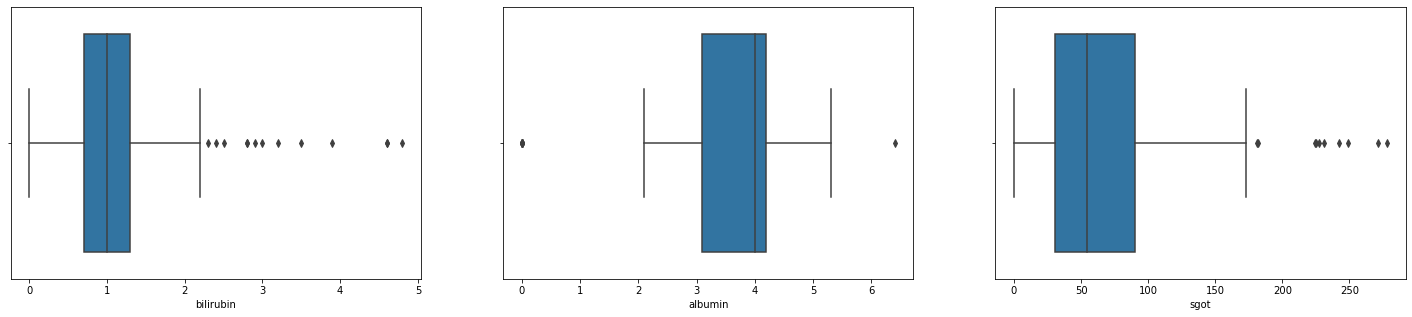

In [65]:
"""
Verifying the outliers by boxplot
"""
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
sns.boxplot(data_out_comb['bilirubin'])

plt.subplot(1,3,2)
sns.boxplot(data_out_comb['albumin'])

plt.subplot(1,3,3)
sns.boxplot(data_out_comb["sgot"])

### Note:
- If after removing the outliers, all of our class type 0 is removed because of small dataset, we will use whole dataset for model building
- Our dataset is imbalanced

-----

### Handling Imbalanced Dataset

In [66]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()

In [67]:
"""
This is very important
Always choose the dataset that have no outliers
"""
X_final = data_out_comb.iloc[:,0:-1]
y_final = data_out_comb.iloc[:,-1]

In [68]:
from sklearn.model_selection import train_test_split
X_traine,X_teste,y_traine,y_teste = train_test_split(X_final, y_final, test_size=0.25, random_state=0)
print(X_traine.shape)
print(X_teste.shape)
print(y_traine.shape)
print(y_teste.shape)
print(X_final.shape)
print(y_final.shape)

(78, 11)
(26, 11)
(78,)
(26,)
(104, 11)
(104,)


In [69]:
y_traine.value_counts()

1    61
0    17
Name: class, dtype: int64

In [70]:
X_train, y_train = sm.fit_resample(X_traine.astype('float'), y_traine)

In [71]:
X_train.tail()

protime        sgot  bilirubin        age  alk_phosphate   albumin  \
117  25.366850   86.178294   0.918057  35.180574      51.551985  2.890971   
118  36.275551   24.724449   1.095919  45.081618     134.346696  2.839798   
119  35.470059   21.831294   1.448197  44.710882      81.650676  2.580715   
120   0.000000  195.865192   2.615131  39.546077     136.243461  0.762586   
121  36.648407   24.351593   1.102698  44.946034     132.109560  2.856746   

      spiders  histology   malaise  fatigue  sex  
117  1.818285   2.000000  1.000000      1.0  1.0  
118  1.000000   2.000000  1.479596      1.0  1.0  
119  1.771088   1.771088  1.228912      1.0  1.0  
120  1.000000   1.000000  1.231087      1.0  1.0  
121  1.000000   2.000000  1.513492      1.0  1.0

In [72]:
X_teste.head()

protime  sgot  bilirubin  age  alk_phosphate  albumin  spiders  \
120        0   153        2.9   56             90      4.0        1   
72         0   271        0.9   51             76      4.4        0   
114        0    75        1.1   36            141      3.3        2   
21        39    98        1.2   27            133      4.1        1   
139       85    44        1.3   45             85      4.2        2   

     histology  malaise  fatigue  sex  
120          2        1        1    1  
72           1        1        1    1  
114          2        2        2    1  
21           1        1        1    1  
139          2        2        2    1

In [73]:
from collections import Counter
print("Before Smote: ", Counter(y_traine))
print("After Smote: ", Counter(y_train))

Before Smote:  Counter({1: 61, 0: 17})
After Smote:  Counter({1: 61, 0: 61})


In [74]:
smote_train_df = pd.concat([X_train,y_train], axis=1)
smote_train_df

protime        sgot  bilirubin        age  alk_phosphate   albumin  \
0     0.000000   30.000000   1.000000  54.000000      85.000000  4.500000   
1    66.000000  227.000000   2.400000  27.000000     168.000000  3.000000   
2     0.000000  120.000000   1.000000  30.000000       0.000000  3.900000   
3    60.000000   90.000000   1.000000  33.000000      46.000000  4.400000   
4     0.000000  110.000000   0.700000  28.000000      74.000000  4.400000   
..         ...         ...        ...        ...            ...       ...   
117  25.366850   86.178294   0.918057  35.180574      51.551985  2.890971   
118  36.275551   24.724449   1.095919  45.081618     134.346696  2.839798   
119  35.470059   21.831294   1.448197  44.710882      81.650676  2.580715   
120   0.000000  195.865192   2.615131  39.546077     136.243461  0.762586   
121  36.648407   24.351593   1.102698  44.946034     132.109560  2.856746   

      spiders  histology   malaise  fatigue  sex  class  
0    2.000000   2.000000  2.000000      2.0  1.0      1  
1    2.000000   2.000000  2.000000      1.0  1.0      1  
2    2.000000   1.000000  2.000000      2.0  1.0      1  
3    2.000000   1.000000  2.000000      2.0  1.0      1  
4    2.000000   1.000000  1.000000      1.0  1.0      1  
..        ...        ...       ...      ...  ...    ...  
117  1.818285   2.000000  1.000000      1.0  1.0      0  
118  1.000000   2.000000  1.479596      1.0  1.0      0  
119  1.771088   1.771088  1.228912      1.0  1.0      0  
120  1.000000   1.000000  1.231087      1.0  1.0      0  
121  1.000000   2.000000  1.513492      1.0  1.0      0  

[122 rows x 12 columns]

In [75]:
test_df = pd.concat([X_teste, y_teste], axis=1)
test_df

protime  sgot  bilirubin  age  alk_phosphate  albumin  spiders  \
120        0   153        2.9   56             90      4.0        1   
72         0   271        0.9   51             76      4.4        0   
114        0    75        1.1   36            141      3.3        2   
21        39    98        1.2   27            133      4.1        1   
139       85    44        1.3   45             85      4.2        2   
145       54   173        1.2   31             75      4.2        2   
8          0    48        0.7   39              0      4.4        2   
48        85    44        0.8   36             85      4.2        2   
64        66    43        0.8   49            103      3.5        2   
37         0    68        2.3   20            150      3.9        1   
86        41    55        0.9   44            135      0.0        2   
60       100    58        0.7   37             26      4.5        2   
149        0    30        0.6   36            120      4.0        2   
135       57   181        1.3   25            181      4.5        1   
43       100    18        0.7   56             71      4.4        2   
78        57    46        1.0   34             72      4.4        1   
5         75    28        0.9   34             95      4.0        2   
87         0    64        2.5   30            165      2.8        1   
19        62    28        0.7   38             70      4.2        2   
74         0   100        1.5   50            100      5.3        2   
82       100    31        0.7   30            100      4.0        2   
118        0     0        0.0   61              0      0.0        1   
119        0    28        3.2   54             85      3.8        2   
101        0    24        0.7   22              0      0.0        2   
53       100    31        1.2   40             85      4.0        2   
132        0   278        2.0   48            158      3.8        1   

     histology  malaise  fatigue  sex  class  
120          2        1        1    1      0  
72           1        1        1    1      1  
114          2        2        2    1      1  
21           1        1        1    1      1  
139          2        2        2    1      1  
145          2        2        1    1      1  
8            1        2        1    1      1  
48           1        2        2    1      1  
64           1        1        1    1      1  
37           1        1        1    2      1  
86           2        1        1    1      0  
60           1        2        2    1      1  
149          2        2        2    1      1  
135          2        2        1    1      1  
43           1        2        1    1      1  
78           1        2        1    1      1  
5            1        2        2    1      1  
87           2        1        1    1      0  
19           1        2        2    1      1  
74           1        2        2    1      1  
82           1        2        2    1      1  
118          2        1        1    1      0  
119          2        2        1    1      1  
101          2        2        2    1      1  
53           1        2        1    1      1  
132          2        1        1    1      1

### Notes:
- Before smotting, there were only 8 samples in '0' class
- After smotting, the samples size increased to 72

----

---

## 3. Model Building

### Importing necessary packages

In [76]:
"""
-  Building the model using various powerful techniques like ANN, XGBoost, Random Forest, AdaBoost, CatBoost
-  Comparing the accuracies and selecting the best model

"""
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, mean_absolute_error,f1_score,mean_squared_error
from sklearn.model_selection import GridSearchCV,train_test_split,RandomizedSearchCV

import keras
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense, Activation,Dropout, BatchNormalization
from keras.models import Sequential

import xgboost,catboost

import pickle, joblib

Using TensorFlow backend.


---

#### XGBoost Classifier

In [77]:
"""
Boosting and bagging dont need scaling since their base model is decision tree
"""
xgbst = xgboost.XGBClassifier()

In [78]:
params={
    "max_depth":[5,15,25,35,45],
    "learning_rate":list(np.linspace(0.01,0.9, 15)),
    "colsample_bytree":list(np.linspace(0.1,0.9,10)),
    "alpha": list(np.linspace(0.1,0.9,10))
}
rscv_xgb = RandomizedSearchCV(xgbst,params,scoring="accuracy",cv=10, random_state=2)
rscv_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100...
                                                             0.8111111111111111,
                                                             0.9],
                                 

In [79]:
rscv_xgb.score(X_teste, y_teste)

0.8846153846153846

In [80]:
rscv_xgb.best_params_

{'max_depth': 45,
 'learning_rate': 0.455,
 'colsample_bytree': 0.3666666666666667,
 'alpha': 0.3666666666666667}

In [329]:
rscv_xgb.best_score_

0.9352564102564103

----

#### AdaBoost Classifier

In [81]:
adbst = AdaBoostClassifier()

In [82]:
params1={
    "n_estimators":[5,15,25,35,45,50],
    "learning_rate":list(np.linspace(0.01,0.9, 15))
}
rscv_adb = RandomizedSearchCV(adbst,params1,scoring="accuracy",cv=10, random_state=2)
rscv_adb.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=AdaBoostClassifier(),
                   param_distributions={'learning_rate': [0.01,
                                                          0.07357142857142857,
                                                          0.13714285714285715,
                                                          0.20071428571428573,
                                                          0.2642857142857143,
                                                          0.32785714285714285,
                                                          0.39142857142857146,
                                                          0.455,
                                                          0.5185714285714286,
                                                          0.5821428571428572,
                                                          0.6457142857142857,
                                                          0.7092857142857143,
                            

In [83]:
rscv_adb.best_params_

{'n_estimators': 25, 'learning_rate': 0.6457142857142857}

In [84]:
rscv_adb.best_score_

0.8794871794871796

In [85]:
rscv_adb.score(X_teste, y_teste)

0.8461538461538461

---

#### Catboost Classifier

In [86]:
ctbst = catboost.CatBoostClassifier()

In [87]:
params2={
    "n_estimators":[5,15,25,35,45,50],
    "learning_rate":list(np.linspace(0.01,0.9, 15)),
    "max_depth":[1,3,5,7,9,11,13,15]
    
}
rscv_ctb = RandomizedSearchCV(ctbst,params2,scoring="accuracy",cv=10, random_state=2)
rscv_ctb.fit(X_train, y_train)

0:	learn: 0.5957149	total: 170ms	remaining: 681ms
1:	learn: 0.5134214	total: 179ms	remaining: 269ms
2:	learn: 0.4636935	total: 189ms	remaining: 126ms
3:	learn: 0.4158780	total: 197ms	remaining: 49.3ms
4:	learn: 0.3765219	total: 206ms	remaining: 0us
0:	learn: 0.6027699	total: 11.8ms	remaining: 47.3ms
1:	learn: 0.5226768	total: 33.8ms	remaining: 50.7ms
2:	learn: 0.4511994	total: 43.2ms	remaining: 28.8ms
3:	learn: 0.3767768	total: 56.9ms	remaining: 14.2ms
4:	learn: 0.3124146	total: 69.2ms	remaining: 0us
0:	learn: 0.6114053	total: 7.83ms	remaining: 31.3ms
1:	learn: 0.5289747	total: 13.4ms	remaining: 20.1ms
2:	learn: 0.4784166	total: 18.9ms	remaining: 12.6ms
3:	learn: 0.3983759	total: 21ms	remaining: 5.24ms
4:	learn: 0.3537193	total: 26.4ms	remaining: 0us
0:	learn: 0.6120181	total: 6.59ms	remaining: 26.4ms
1:	learn: 0.5353819	total: 11.9ms	remaining: 17.9ms
2:	learn: 0.4752440	total: 17.2ms	remaining: 11.4ms
3:	learn: 0.4309645	total: 22.4ms	remaining: 5.6ms
4:	learn: 0.3921106	total: 27.8m

10:	learn: 0.1632812	total: 15ms	remaining: 19.1ms
11:	learn: 0.1446005	total: 16.3ms	remaining: 17.7ms
12:	learn: 0.1330432	total: 17.6ms	remaining: 16.2ms
13:	learn: 0.1243685	total: 18.8ms	remaining: 14.8ms
14:	learn: 0.1173450	total: 20.1ms	remaining: 13.4ms
15:	learn: 0.1108804	total: 21.5ms	remaining: 12.1ms
16:	learn: 0.1022079	total: 23.1ms	remaining: 10.9ms
17:	learn: 0.0956513	total: 24.4ms	remaining: 9.49ms
18:	learn: 0.0896283	total: 25.7ms	remaining: 8.13ms
19:	learn: 0.0835266	total: 27.2ms	remaining: 6.79ms
20:	learn: 0.0798270	total: 28.3ms	remaining: 5.39ms
21:	learn: 0.0755116	total: 29.4ms	remaining: 4.01ms
22:	learn: 0.0727795	total: 30.5ms	remaining: 2.66ms
23:	learn: 0.0691872	total: 31.7ms	remaining: 1.32ms
24:	learn: 0.0657837	total: 32.9ms	remaining: 0us
0:	learn: 0.5270029	total: 1.57ms	remaining: 37.7ms
1:	learn: 0.4493254	total: 2.75ms	remaining: 31.7ms
2:	learn: 0.3835706	total: 3.92ms	remaining: 28.8ms
3:	learn: 0.3329441	total: 5.12ms	remaining: 26.9ms
4:

0:	learn: 0.6744857	total: 19ms	remaining: 646ms
1:	learn: 0.6498440	total: 38.8ms	remaining: 640ms
2:	learn: 0.6305842	total: 58.3ms	remaining: 622ms
3:	learn: 0.6069304	total: 62.8ms	remaining: 487ms
4:	learn: 0.5922900	total: 81.8ms	remaining: 491ms
5:	learn: 0.5682556	total: 101ms	remaining: 490ms
6:	learn: 0.5380363	total: 103ms	remaining: 410ms
7:	learn: 0.5229474	total: 121ms	remaining: 408ms
8:	learn: 0.5108909	total: 139ms	remaining: 402ms
9:	learn: 0.4961342	total: 158ms	remaining: 396ms
10:	learn: 0.4822957	total: 176ms	remaining: 385ms
11:	learn: 0.4724910	total: 190ms	remaining: 365ms
12:	learn: 0.4618328	total: 204ms	remaining: 345ms
13:	learn: 0.4516110	total: 216ms	remaining: 324ms
14:	learn: 0.4409728	total: 226ms	remaining: 302ms
15:	learn: 0.4308034	total: 237ms	remaining: 282ms
16:	learn: 0.4215226	total: 249ms	remaining: 263ms
17:	learn: 0.4144697	total: 259ms	remaining: 245ms
18:	learn: 0.4068778	total: 272ms	remaining: 229ms
19:	learn: 0.3988983	total: 289ms	rema

28:	learn: 0.3384524	total: 461ms	remaining: 95.3ms
29:	learn: 0.3307678	total: 478ms	remaining: 79.6ms
30:	learn: 0.3176859	total: 479ms	remaining: 61.8ms
31:	learn: 0.3128442	total: 497ms	remaining: 46.5ms
32:	learn: 0.3032026	total: 498ms	remaining: 30.2ms
33:	learn: 0.2949379	total: 499ms	remaining: 14.7ms
34:	learn: 0.2852825	total: 501ms	remaining: 0us
0:	learn: 0.6673799	total: 20.1ms	remaining: 684ms
1:	learn: 0.6453933	total: 39.7ms	remaining: 655ms
2:	learn: 0.6274518	total: 59.4ms	remaining: 634ms
3:	learn: 0.6075363	total: 63.8ms	remaining: 494ms
4:	learn: 0.5931457	total: 83.2ms	remaining: 499ms
5:	learn: 0.5721278	total: 93.6ms	remaining: 452ms
6:	learn: 0.5471517	total: 95.2ms	remaining: 381ms
7:	learn: 0.5351079	total: 113ms	remaining: 381ms
8:	learn: 0.5231615	total: 132ms	remaining: 382ms
9:	learn: 0.5092107	total: 142ms	remaining: 354ms
10:	learn: 0.4968298	total: 151ms	remaining: 329ms
11:	learn: 0.4859897	total: 160ms	remaining: 307ms
12:	learn: 0.4680829	total: 16

0:	learn: 0.5443861	total: 5.52ms	remaining: 270ms
1:	learn: 0.4445329	total: 8.27ms	remaining: 198ms
2:	learn: 0.3615842	total: 11.2ms	remaining: 175ms
3:	learn: 0.3118425	total: 14.3ms	remaining: 164ms
4:	learn: 0.2705727	total: 17.6ms	remaining: 159ms
5:	learn: 0.2334830	total: 20.6ms	remaining: 151ms
6:	learn: 0.2078177	total: 23.8ms	remaining: 146ms
7:	learn: 0.1799649	total: 27.5ms	remaining: 144ms
8:	learn: 0.1605726	total: 30.4ms	remaining: 139ms
9:	learn: 0.1416052	total: 33.6ms	remaining: 135ms
10:	learn: 0.1265690	total: 36.6ms	remaining: 130ms
11:	learn: 0.1142300	total: 39ms	remaining: 124ms
12:	learn: 0.1021274	total: 41.8ms	remaining: 119ms
13:	learn: 0.0915910	total: 44.1ms	remaining: 113ms
14:	learn: 0.0809389	total: 46.7ms	remaining: 109ms
15:	learn: 0.0742442	total: 49.5ms	remaining: 105ms
16:	learn: 0.0686844	total: 52.4ms	remaining: 102ms
17:	learn: 0.0639515	total: 55.1ms	remaining: 98ms
18:	learn: 0.0599034	total: 57.4ms	remaining: 93.7ms
19:	learn: 0.0562815	tot

29:	learn: 0.0436658	total: 60.9ms	remaining: 40.6ms
30:	learn: 0.0426374	total: 63ms	remaining: 38.6ms
31:	learn: 0.0412221	total: 65.9ms	remaining: 37.1ms
32:	learn: 0.0396252	total: 68ms	remaining: 35ms
33:	learn: 0.0383513	total: 70ms	remaining: 32.9ms
34:	learn: 0.0371130	total: 71.9ms	remaining: 30.8ms
35:	learn: 0.0363615	total: 73.8ms	remaining: 28.7ms
36:	learn: 0.0352925	total: 75.6ms	remaining: 26.6ms
37:	learn: 0.0341449	total: 77.7ms	remaining: 24.5ms
38:	learn: 0.0331508	total: 79.3ms	remaining: 22.4ms
39:	learn: 0.0321008	total: 81.1ms	remaining: 20.3ms
40:	learn: 0.0308139	total: 82.8ms	remaining: 18.2ms
41:	learn: 0.0297425	total: 84.5ms	remaining: 16.1ms
42:	learn: 0.0287568	total: 86.4ms	remaining: 14.1ms
43:	learn: 0.0275012	total: 88.4ms	remaining: 12.1ms
44:	learn: 0.0271175	total: 90.4ms	remaining: 10ms
45:	learn: 0.0262613	total: 92.3ms	remaining: 8.02ms
46:	learn: 0.0255219	total: 94ms	remaining: 6ms
47:	learn: 0.0250488	total: 95.9ms	remaining: 3.99ms
48:	lear

0:	learn: 0.5575108	total: 3.59ms	remaining: 176ms
1:	learn: 0.4434806	total: 5.87ms	remaining: 141ms
2:	learn: 0.3769678	total: 7.86ms	remaining: 123ms
3:	learn: 0.3350049	total: 9.81ms	remaining: 113ms
4:	learn: 0.2884243	total: 12.1ms	remaining: 109ms
5:	learn: 0.2540063	total: 14.2ms	remaining: 104ms
6:	learn: 0.2283097	total: 16.3ms	remaining: 100ms
7:	learn: 0.2050865	total: 18.4ms	remaining: 96.9ms
8:	learn: 0.1856726	total: 20.6ms	remaining: 93.9ms
9:	learn: 0.1684229	total: 22.7ms	remaining: 91ms
10:	learn: 0.1497302	total: 24.9ms	remaining: 88.2ms
11:	learn: 0.1335883	total: 26.9ms	remaining: 85.3ms
12:	learn: 0.1220779	total: 29.1ms	remaining: 82.8ms
13:	learn: 0.1135235	total: 31.2ms	remaining: 80.2ms
14:	learn: 0.1065438	total: 33.3ms	remaining: 77.8ms
15:	learn: 0.0993099	total: 35.2ms	remaining: 74.8ms
16:	learn: 0.0937547	total: 37.3ms	remaining: 72.5ms
17:	learn: 0.0858824	total: 39.4ms	remaining: 70.1ms
18:	learn: 0.0809555	total: 41.5ms	remaining: 67.7ms
19:	learn: 0

1:	learn: 0.3675373	total: 2.78ms	remaining: 59.7ms
2:	learn: 0.3105056	total: 4.15ms	remaining: 58.1ms
3:	learn: 0.2801536	total: 5.17ms	remaining: 53ms
4:	learn: 0.2500881	total: 6.17ms	remaining: 49.4ms
5:	learn: 0.2173406	total: 7.16ms	remaining: 46.5ms
6:	learn: 0.1987767	total: 8.14ms	remaining: 44.2ms
7:	learn: 0.1831932	total: 9.05ms	remaining: 41.8ms
8:	learn: 0.1729799	total: 9.97ms	remaining: 39.9ms
9:	learn: 0.1611189	total: 10.9ms	remaining: 38.2ms
10:	learn: 0.1456972	total: 11.9ms	remaining: 36.8ms
11:	learn: 0.1419959	total: 13.1ms	remaining: 36ms
12:	learn: 0.1406426	total: 14.1ms	remaining: 34.6ms
13:	learn: 0.1324066	total: 15ms	remaining: 33.3ms
14:	learn: 0.1224017	total: 16ms	remaining: 32ms
15:	learn: 0.1192117	total: 17ms	remaining: 30.8ms
16:	learn: 0.1147263	total: 18ms	remaining: 29.7ms
17:	learn: 0.0999465	total: 19ms	remaining: 28.5ms
18:	learn: 0.0943220	total: 20ms	remaining: 27.3ms
19:	learn: 0.0909239	total: 21ms	remaining: 26.3ms
20:	learn: 0.0828999	t

1:	learn: 0.3601743	total: 2.85ms	remaining: 61.3ms
2:	learn: 0.3187601	total: 4.37ms	remaining: 61.2ms
3:	learn: 0.2931793	total: 5.52ms	remaining: 56.6ms
4:	learn: 0.2640161	total: 6.55ms	remaining: 52.4ms
5:	learn: 0.2376573	total: 7.54ms	remaining: 49ms
6:	learn: 0.2091002	total: 8.47ms	remaining: 46ms
7:	learn: 0.1887984	total: 9.39ms	remaining: 43.4ms
8:	learn: 0.1686564	total: 10.3ms	remaining: 41.3ms
9:	learn: 0.1661516	total: 11.2ms	remaining: 39.3ms
10:	learn: 0.1526484	total: 12.2ms	remaining: 37.6ms
11:	learn: 0.1509388	total: 13.1ms	remaining: 36.1ms
12:	learn: 0.1387938	total: 14.1ms	remaining: 34.7ms
13:	learn: 0.1374364	total: 15.1ms	remaining: 33.4ms
14:	learn: 0.1293149	total: 16ms	remaining: 32ms
15:	learn: 0.1168902	total: 17ms	remaining: 30.8ms
16:	learn: 0.1062130	total: 18ms	remaining: 29.7ms
17:	learn: 0.0933256	total: 19ms	remaining: 28.5ms
18:	learn: 0.0898808	total: 20.1ms	remaining: 27.5ms
19:	learn: 0.0838488	total: 21.2ms	remaining: 26.5ms
20:	learn: 0.082

5:	learn: 0.2395076	total: 7.29ms	remaining: 10.9ms
6:	learn: 0.2225908	total: 8.77ms	remaining: 10ms
7:	learn: 0.2130573	total: 9.96ms	remaining: 8.71ms
8:	learn: 0.1929240	total: 11.1ms	remaining: 7.41ms
9:	learn: 0.1811721	total: 12.2ms	remaining: 6.11ms
10:	learn: 0.1775229	total: 13.3ms	remaining: 4.84ms
11:	learn: 0.1640172	total: 14.4ms	remaining: 3.6ms
12:	learn: 0.1541173	total: 15.5ms	remaining: 2.39ms
13:	learn: 0.1482007	total: 16.7ms	remaining: 1.19ms
14:	learn: 0.1370102	total: 17.8ms	remaining: 0us
0:	learn: 0.5106697	total: 1.12ms	remaining: 15.7ms
1:	learn: 0.3937617	total: 2.28ms	remaining: 14.8ms
2:	learn: 0.3333214	total: 3.42ms	remaining: 13.7ms
3:	learn: 0.2863127	total: 4.54ms	remaining: 12.5ms
4:	learn: 0.2621278	total: 5.66ms	remaining: 11.3ms
5:	learn: 0.2339543	total: 6.79ms	remaining: 10.2ms
6:	learn: 0.2173276	total: 7.9ms	remaining: 9.03ms
7:	learn: 0.1941406	total: 9.03ms	remaining: 7.9ms
8:	learn: 0.1815510	total: 10.2ms	remaining: 6.81ms
9:	learn: 0.166

3:	learn: 0.6864316	total: 245ms	remaining: 674ms
4:	learn: 0.6838042	total: 247ms	remaining: 494ms
5:	learn: 0.6819077	total: 266ms	remaining: 400ms
6:	learn: 0.6806060	total: 344ms	remaining: 394ms
7:	learn: 0.6791998	total: 431ms	remaining: 377ms
8:	learn: 0.6779562	total: 538ms	remaining: 359ms
9:	learn: 0.6762526	total: 543ms	remaining: 271ms
10:	learn: 0.6750212	total: 630ms	remaining: 229ms
11:	learn: 0.6737265	total: 712ms	remaining: 178ms
12:	learn: 0.6717430	total: 717ms	remaining: 110ms
13:	learn: 0.6703970	total: 758ms	remaining: 54.2ms
14:	learn: 0.6685530	total: 767ms	remaining: 0us
0:	learn: 0.6918925	total: 83.2ms	remaining: 1.17s
1:	learn: 0.6906236	total: 170ms	remaining: 1.1s
2:	learn: 0.6887177	total: 179ms	remaining: 718ms
3:	learn: 0.6865434	total: 184ms	remaining: 507ms
4:	learn: 0.6853444	total: 264ms	remaining: 527ms
5:	learn: 0.6820625	total: 266ms	remaining: 399ms
6:	learn: 0.6787658	total: 267ms	remaining: 305ms
7:	learn: 0.6777353	total: 344ms	remaining: 30

16:	learn: 0.2463325	total: 12.9ms	remaining: 21.2ms
17:	learn: 0.2447118	total: 13.7ms	remaining: 20.5ms
18:	learn: 0.2436204	total: 14.4ms	remaining: 19.7ms
19:	learn: 0.2428130	total: 15ms	remaining: 18.8ms
20:	learn: 0.2363556	total: 15.8ms	remaining: 18.1ms
21:	learn: 0.2355038	total: 16.5ms	remaining: 17.3ms
22:	learn: 0.2348089	total: 17.2ms	remaining: 16.5ms
23:	learn: 0.2342051	total: 17.9ms	remaining: 15.7ms
24:	learn: 0.2322886	total: 18.6ms	remaining: 14.9ms
25:	learn: 0.2311300	total: 19.3ms	remaining: 14.1ms
26:	learn: 0.2306293	total: 20ms	remaining: 13.3ms
27:	learn: 0.2289860	total: 20.7ms	remaining: 12.5ms
28:	learn: 0.2281847	total: 21.4ms	remaining: 11.8ms
29:	learn: 0.2235083	total: 22.1ms	remaining: 11.1ms
30:	learn: 0.2223403	total: 22.8ms	remaining: 10.3ms
31:	learn: 0.2173098	total: 23.6ms	remaining: 9.59ms
32:	learn: 0.2123873	total: 24.4ms	remaining: 8.86ms
33:	learn: 0.2117520	total: 25.2ms	remaining: 8.15ms
34:	learn: 0.2111607	total: 26.2ms	remaining: 7.49

29:	learn: 0.2478829	total: 25.3ms	remaining: 12.7ms
30:	learn: 0.2468836	total: 26.2ms	remaining: 11.8ms
31:	learn: 0.2460049	total: 27ms	remaining: 11ms
32:	learn: 0.2455806	total: 27.7ms	remaining: 10.1ms
33:	learn: 0.2451809	total: 28.5ms	remaining: 9.21ms
34:	learn: 0.2440621	total: 29.3ms	remaining: 8.36ms
35:	learn: 0.2432973	total: 30ms	remaining: 7.5ms
36:	learn: 0.2423824	total: 30.8ms	remaining: 6.65ms
37:	learn: 0.2376181	total: 31.5ms	remaining: 5.79ms
38:	learn: 0.2369327	total: 32.2ms	remaining: 4.96ms
39:	learn: 0.2361533	total: 33.2ms	remaining: 4.15ms
40:	learn: 0.2320256	total: 34ms	remaining: 3.31ms
41:	learn: 0.2310225	total: 34.7ms	remaining: 2.48ms
42:	learn: 0.2270034	total: 35.4ms	remaining: 1.65ms
43:	learn: 0.2232480	total: 36.1ms	remaining: 820us
44:	learn: 0.2227667	total: 36.8ms	remaining: 0us
0:	learn: 0.6210783	total: 1.04ms	remaining: 46ms
1:	learn: 0.5388811	total: 1.82ms	remaining: 39.1ms
2:	learn: 0.4952691	total: 2.59ms	remaining: 36.3ms
3:	learn: 0

7:	learn: 0.6787438	total: 369ms	remaining: 323ms
8:	learn: 0.6776076	total: 452ms	remaining: 301ms
9:	learn: 0.6764102	total: 536ms	remaining: 268ms
10:	learn: 0.6751451	total: 612ms	remaining: 222ms
11:	learn: 0.6735305	total: 616ms	remaining: 154ms
12:	learn: 0.6714413	total: 626ms	remaining: 96.3ms
13:	learn: 0.6693535	total: 647ms	remaining: 46.2ms
14:	learn: 0.6680160	total: 729ms	remaining: 0us


RandomizedSearchCV(cv=10,
                   estimator=<catboost.core.CatBoostClassifier object at 0x000001F604443AC8>,
                   param_distributions={'learning_rate': [0.01,
                                                          0.07357142857142857,
                                                          0.13714285714285715,
                                                          0.20071428571428573,
                                                          0.2642857142857143,
                                                          0.32785714285714285,
                                                          0.39142857142857146,
                                                          0.455,
                                                          0.5185714285714286,
                                                          0.5821428571428572,
                                                          0.6457142857142857,
                                            

In [88]:
rscv_ctb.best_params_

{'n_estimators': 15, 'max_depth': 13, 'learning_rate': 0.01}

In [89]:
rscv_ctb.best_score_

0.9032051282051281

In [90]:
rscv_ctb.score(X_teste,y_teste)

0.9615384615384616

----

#### Random Forest Classifier

In [91]:
rfc = RandomForestClassifier()

In [92]:
params3={
    "n_estimators":[50,100,150,200,250,300],
    "max_depth":[1,3,5,7,9,11,13,15]
    
}
rscv_rfc = RandomizedSearchCV(rfc,params3,scoring="accuracy",cv=10, random_state=2)
rscv_rfc.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [1, 3, 5, 7, 9, 11, 13,
                                                      15],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300]},
                   random_state=2, scoring='accuracy')

In [93]:
rscv_rfc.best_params_

{'n_estimators': 250, 'max_depth': 5}

In [94]:
rscv_rfc.best_score_

0.8955128205128204

In [95]:
rscv_rfc.score(X_teste,y_teste)

0.9230769230769231

---

#### ANN

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F604438C08>,
      dtype=object)

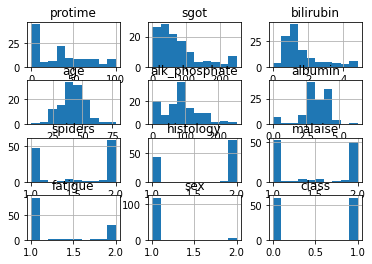

In [96]:
smote_train_df.hist()

In [97]:
"""
Neural nets need scaling of data
"""
from sklearn.preprocessing import StandardScaler,MinMaxScaler
ss = StandardScaler()
mm = MinMaxScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_teste)

In [98]:
new_x_col = list(data_out_comb.columns)
new_x_col.remove("class")
new_x_col

['protime',
 'sgot',
 'bilirubin',
 'age',
 'alk_phosphate',
 'albumin',
 'spiders',
 'histology',
 'malaise',
 'fatigue',
 'sex']

In [99]:
X_train = pd.DataFrame(X_train, columns=new_x_col)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F604948708>,
      dtype=object)

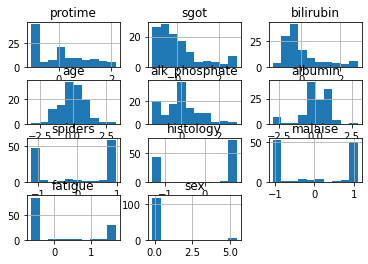

In [100]:
X_train.hist()

In [101]:
X_test = pd.DataFrame(X_test, columns=new_x_col)

In [102]:
X_train.head()

protime      sgot  bilirubin       age  alk_phosphate   albumin   spiders  \
0 -1.044092 -0.725174  -0.537601  1.087873      -0.062835  1.174158  0.966593   
1  1.082392  2.511823   0.723967 -1.351362       1.395491 -0.196771  0.966593   
2 -1.044092  0.753657  -0.537601 -1.080336      -1.556302  0.625786  0.966593   
3  0.889075  0.260713  -0.537601 -0.809310      -0.748073  1.082763  0.966593   
4 -1.044092  0.589342  -0.807937 -1.261020      -0.256107  1.082763  0.966593   

   histology   malaise   fatigue       sex  
0   0.786810  1.100341  1.682239 -0.184115  
1   0.786810  1.100341 -0.625993 -0.184115  
2  -1.320656  1.100341  1.682239 -0.184115  
3  -1.320656  1.100341  1.682239 -0.184115  
4  -1.320656 -1.051418 -0.625993 -0.184115

In [103]:
y_train = pd.DataFrame(y_train, columns=["class"])

In [104]:
y_test = pd.DataFrame(y_teste, columns=["class"])
y_test.head()

class
120      0
72       1
114      1
21       1
139      1

In [105]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(122, 11)
(122, 1)
(26, 11)
(26, 1)


In [106]:
"""
Building the model using simple ANN
"""

def model_build(optimizer):
    model= Sequential([
        Dense(24, activation="relu",input_shape=(X_final.shape[1], )),
        Dropout(0.3),
        Dense(24, activation="relu"),
        Dropout(0.3),
        Dense(1, activation='sigmoid')  
        
    ])
    
    model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=['accuracy'])
    return model

model_ann = KerasClassifier(build_fn=model_build)
parameters = {'optimizer':['adam'],'batch_size':[4,8], 'epochs':[50]}
grcv_ann = GridSearchCV(model_ann, parameters, cv=10, scoring='accuracy')

grcv_ann.fit(X_train, y_train)

Epoch 1/50
109/109 [==============================] - 0s 4ms/step - loss: 0.9037 - accuracy: 0.3761
Epoch 2/50
109/109 [==============================] - 0s 1ms/step - loss: 0.7651 - accuracy: 0.4862
Epoch 3/50
109/109 [==============================] - 0s 952us/step - loss: 0.7112 - accuracy: 0.5138
Epoch 4/50
109/109 [==============================] - 0s 657us/step - loss: 0.6628 - accuracy: 0.5872
Epoch 5/50
109/109 [==============================] - 0s 605us/step - loss: 0.6273 - accuracy: 0.5963
Epoch 6/50
109/109 [==============================] - 0s 725us/step - loss: 0.6218 - accuracy: 0.6972
Epoch 7/50
109/109 [==============================] - 0s 629us/step - loss: 0.5209 - accuracy: 0.7890
Epoch 8/50
109/109 [==============================] - 0s 712us/step - loss: 0.5481 - accuracy: 0.7248
Epoch 9/50
109/109 [==============================] - 0s 688us/step - loss: 0.4693 - accuracy: 0.8073
Epoch 10/50
109/109 [==============================] - 0s 611us/step - loss: 0.4501 - 

109/109 [==============================] - 0s 613us/step - loss: 0.1845 - accuracy: 0.9266
Epoch 31/50
109/109 [==============================] - 0s 622us/step - loss: 0.1841 - accuracy: 0.9266
Epoch 32/50
109/109 [==============================] - 0s 598us/step - loss: 0.1856 - accuracy: 0.9083
Epoch 33/50
109/109 [==============================] - 0s 577us/step - loss: 0.1819 - accuracy: 0.9174
Epoch 34/50
109/109 [==============================] - 0s 602us/step - loss: 0.1778 - accuracy: 0.9266
Epoch 35/50
109/109 [==============================] - 0s 549us/step - loss: 0.1454 - accuracy: 0.9450
Epoch 36/50
109/109 [==============================] - 0s 457us/step - loss: 0.1618 - accuracy: 0.9266
Epoch 37/50
109/109 [==============================] - 0s 612us/step - loss: 0.1357 - accuracy: 0.9725
Epoch 38/50
109/109 [==============================] - 0s 670us/step - loss: 0.1630 - accuracy: 0.9083
Epoch 39/50
109/109 [==============================] - 0s 620us/step - loss: 0.1280 -

110/110 [==============================] - 0s 563us/step - loss: 0.4392 - accuracy: 0.8182
Epoch 10/50
110/110 [==============================] - 0s 446us/step - loss: 0.4082 - accuracy: 0.8273
Epoch 11/50
110/110 [==============================] - 0s 479us/step - loss: 0.4189 - accuracy: 0.8273
Epoch 12/50
110/110 [==============================] - 0s 521us/step - loss: 0.3993 - accuracy: 0.8636
Epoch 13/50
110/110 [==============================] - 0s 502us/step - loss: 0.3673 - accuracy: 0.8636
Epoch 14/50
110/110 [==============================] - 0s 556us/step - loss: 0.3671 - accuracy: 0.8727
Epoch 15/50
110/110 [==============================] - 0s 552us/step - loss: 0.3102 - accuracy: 0.8818
Epoch 16/50
110/110 [==============================] - 0s 558us/step - loss: 0.3218 - accuracy: 0.8727
Epoch 17/50
110/110 [==============================] - 0s 564us/step - loss: 0.3191 - accuracy: 0.8727
Epoch 18/50
110/110 [==============================] - 0s 585us/step - loss: 0.3326 -

110/110 [==============================] - 0s 445us/step - loss: 0.2147 - accuracy: 0.9364
Epoch 39/50
110/110 [==============================] - 0s 650us/step - loss: 0.1900 - accuracy: 0.9364
Epoch 40/50
110/110 [==============================] - 0s 552us/step - loss: 0.2219 - accuracy: 0.9273
Epoch 41/50
110/110 [==============================] - 0s 454us/step - loss: 0.1804 - accuracy: 0.9273
Epoch 42/50
110/110 [==============================] - 0s 665us/step - loss: 0.1466 - accuracy: 0.9455
Epoch 43/50
110/110 [==============================] - 0s 527us/step - loss: 0.1232 - accuracy: 0.9818
Epoch 44/50
110/110 [==============================] - 0s 402us/step - loss: 0.1946 - accuracy: 0.9455
Epoch 45/50
110/110 [==============================] - 0s 606us/step - loss: 0.1548 - accuracy: 0.9545
Epoch 46/50
110/110 [==============================] - 0s 646us/step - loss: 0.1055 - accuracy: 0.9727
Epoch 47/50
110/110 [==============================] - 0s 481us/step - loss: 0.1801 -

110/110 [==============================] - 0s 605us/step - loss: 0.2888 - accuracy: 0.8818
Epoch 18/50
110/110 [==============================] - 0s 599us/step - loss: 0.3265 - accuracy: 0.8545
Epoch 19/50
110/110 [==============================] - 0s 652us/step - loss: 0.3109 - accuracy: 0.8455
Epoch 20/50
110/110 [==============================] - 0s 539us/step - loss: 0.2642 - accuracy: 0.8727
Epoch 21/50
110/110 [==============================] - 0s 594us/step - loss: 0.3252 - accuracy: 0.8818
Epoch 22/50
110/110 [==============================] - 0s 657us/step - loss: 0.2500 - accuracy: 0.9364
Epoch 23/50
110/110 [==============================] - 0s 655us/step - loss: 0.2548 - accuracy: 0.9091
Epoch 24/50
110/110 [==============================] - 0s 570us/step - loss: 0.2528 - accuracy: 0.8909
Epoch 25/50
110/110 [==============================] - 0s 423us/step - loss: 0.2357 - accuracy: 0.9273
Epoch 26/50
110/110 [==============================] - 0s 535us/step - loss: 0.2487 -

110/110 [==============================] - 0s 605us/step - loss: 0.1579 - accuracy: 0.9636
Epoch 47/50
110/110 [==============================] - 0s 596us/step - loss: 0.2005 - accuracy: 0.9182
Epoch 48/50
110/110 [==============================] - 0s 568us/step - loss: 0.1809 - accuracy: 0.9545
Epoch 49/50
110/110 [==============================] - 0s 649us/step - loss: 0.1642 - accuracy: 0.9636
Epoch 50/50
110/110 [==============================] - 0s 592us/step - loss: 0.1146 - accuracy: 0.9455
Epoch 1/50
110/110 [==============================] - 0s 3ms/step - loss: 0.6733 - accuracy: 0.6091
Epoch 2/50
110/110 [==============================] - 0s 571us/step - loss: 0.6465 - accuracy: 0.6364
Epoch 3/50
110/110 [==============================] - 0s 416us/step - loss: 0.5585 - accuracy: 0.7455
Epoch 4/50
110/110 [==============================] - 0s 550us/step - loss: 0.5279 - accuracy: 0.8545
Epoch 5/50
110/110 [==============================] - 0s 578us/step - loss: 0.5184 - accura

110/110 [==============================] - 0s 591us/step - loss: 0.2253 - accuracy: 0.9273
Epoch 26/50
110/110 [==============================] - 0s 609us/step - loss: 0.2803 - accuracy: 0.9000
Epoch 27/50
110/110 [==============================] - 0s 622us/step - loss: 0.2640 - accuracy: 0.9091
Epoch 28/50
110/110 [==============================] - 0s 599us/step - loss: 0.2519 - accuracy: 0.9091
Epoch 29/50
110/110 [==============================] - 0s 608us/step - loss: 0.2488 - accuracy: 0.9000
Epoch 30/50
110/110 [==============================] - 0s 597us/step - loss: 0.2608 - accuracy: 0.9273
Epoch 31/50
110/110 [==============================] - 0s 595us/step - loss: 0.2733 - accuracy: 0.9091
Epoch 32/50
110/110 [==============================] - 0s 609us/step - loss: 0.2124 - accuracy: 0.9182
Epoch 33/50
110/110 [==============================] - 0s 605us/step - loss: 0.2380 - accuracy: 0.9091
Epoch 34/50
110/110 [==============================] - 0s 606us/step - loss: 0.2451 -

109/109 [==============================] - 0s 308us/step - loss: 0.5513 - accuracy: 0.7615
Epoch 5/50
109/109 [==============================] - 0s 298us/step - loss: 0.5545 - accuracy: 0.7339
Epoch 6/50
109/109 [==============================] - 0s 301us/step - loss: 0.5772 - accuracy: 0.7156
Epoch 7/50
109/109 [==============================] - 0s 297us/step - loss: 0.5071 - accuracy: 0.7798
Epoch 8/50
109/109 [==============================] - 0s 305us/step - loss: 0.4681 - accuracy: 0.7431
Epoch 9/50
109/109 [==============================] - 0s 309us/step - loss: 0.4385 - accuracy: 0.8349
Epoch 10/50
109/109 [==============================] - 0s 301us/step - loss: 0.4392 - accuracy: 0.8165
Epoch 11/50
109/109 [==============================] - 0s 309us/step - loss: 0.4364 - accuracy: 0.8257
Epoch 12/50
109/109 [==============================] - 0s 342us/step - loss: 0.3922 - accuracy: 0.8624
Epoch 13/50
109/109 [==============================] - 0s 259us/step - loss: 0.3683 - accu

110/110 [==============================] - 0s 298us/step - loss: 0.2507 - accuracy: 0.9273
Epoch 34/50
110/110 [==============================] - 0s 303us/step - loss: 0.2517 - accuracy: 0.9000
Epoch 35/50
110/110 [==============================] - 0s 299us/step - loss: 0.1970 - accuracy: 0.9182
Epoch 36/50
110/110 [==============================] - 0s 307us/step - loss: 0.2154 - accuracy: 0.8818
Epoch 37/50
110/110 [==============================] - 0s 369us/step - loss: 0.2508 - accuracy: 0.9182
Epoch 38/50
110/110 [==============================] - 0s 300us/step - loss: 0.2121 - accuracy: 0.9273
Epoch 39/50
110/110 [==============================] - 0s 236us/step - loss: 0.1882 - accuracy: 0.9364
Epoch 40/50
110/110 [==============================] - 0s 298us/step - loss: 0.1781 - accuracy: 0.9636
Epoch 41/50
110/110 [==============================] - 0s 289us/step - loss: 0.2251 - accuracy: 0.9000
Epoch 42/50
110/110 [==============================] - 0s 300us/step - loss: 0.2439 -

110/110 [==============================] - 0s 463us/step - loss: 0.3933 - accuracy: 0.8364
Epoch 13/50
110/110 [==============================] - 0s 648us/step - loss: 0.3930 - accuracy: 0.8364
Epoch 14/50
110/110 [==============================] - 0s 587us/step - loss: 0.3858 - accuracy: 0.8364
Epoch 15/50
110/110 [==============================] - 0s 536us/step - loss: 0.3693 - accuracy: 0.8727
Epoch 16/50
110/110 [==============================] - 0s 617us/step - loss: 0.3547 - accuracy: 0.8909
Epoch 17/50
110/110 [==============================] - 0s 450us/step - loss: 0.3271 - accuracy: 0.8818
Epoch 18/50
110/110 [==============================] - 0s 306us/step - loss: 0.2995 - accuracy: 0.9000
Epoch 19/50
110/110 [==============================] - 0s 296us/step - loss: 0.3198 - accuracy: 0.8818
Epoch 20/50
110/110 [==============================] - 0s 421us/step - loss: 0.2850 - accuracy: 0.9000
Epoch 21/50
110/110 [==============================] - 0s 305us/step - loss: 0.2972 -

110/110 [==============================] - 0s 272us/step - loss: 0.2583 - accuracy: 0.9000
Epoch 42/50
110/110 [==============================] - 0s 249us/step - loss: 0.2307 - accuracy: 0.9182
Epoch 43/50
110/110 [==============================] - 0s 289us/step - loss: 0.2117 - accuracy: 0.9182
Epoch 44/50
110/110 [==============================] - 0s 292us/step - loss: 0.2401 - accuracy: 0.9000
Epoch 45/50
110/110 [==============================] - 0s 281us/step - loss: 0.2131 - accuracy: 0.9182
Epoch 46/50
110/110 [==============================] - 0s 296us/step - loss: 0.2214 - accuracy: 0.9000
Epoch 47/50
110/110 [==============================] - 0s 311us/step - loss: 0.2104 - accuracy: 0.9273
Epoch 48/50
110/110 [==============================] - 0s 293us/step - loss: 0.2091 - accuracy: 0.9364
Epoch 49/50
110/110 [==============================] - 0s 300us/step - loss: 0.1874 - accuracy: 0.9545
Epoch 50/50
110/110 [==============================] - 0s 310us/step - loss: 0.2148 -

110/110 [==============================] - 0s 250us/step - loss: 0.3895 - accuracy: 0.8273
Epoch 21/50
110/110 [==============================] - 0s 290us/step - loss: 0.3802 - accuracy: 0.8636
Epoch 22/50
110/110 [==============================] - 0s 212us/step - loss: 0.3363 - accuracy: 0.8636
Epoch 23/50
110/110 [==============================] - 0s 233us/step - loss: 0.3178 - accuracy: 0.8636
Epoch 24/50
110/110 [==============================] - 0s 232us/step - loss: 0.3733 - accuracy: 0.8455
Epoch 25/50
110/110 [==============================] - 0s 238us/step - loss: 0.3322 - accuracy: 0.8364
Epoch 26/50
110/110 [==============================] - 0s 247us/step - loss: 0.3094 - accuracy: 0.8727
Epoch 27/50
110/110 [==============================] - 0s 301us/step - loss: 0.3264 - accuracy: 0.8455
Epoch 28/50
110/110 [==============================] - 0s 302us/step - loss: 0.3364 - accuracy: 0.8909
Epoch 29/50
110/110 [==============================] - 0s 242us/step - loss: 0.3046 -

Epoch 49/50
110/110 [==============================] - 0s 293us/step - loss: 0.2930 - accuracy: 0.8909
Epoch 50/50
110/110 [==============================] - 0s 313us/step - loss: 0.2110 - accuracy: 0.9455
Epoch 1/50
110/110 [==============================] - 0s 3ms/step - loss: 0.7037 - accuracy: 0.5545
Epoch 2/50
110/110 [==============================] - 0s 249us/step - loss: 0.6578 - accuracy: 0.6091
Epoch 3/50
110/110 [==============================] - 0s 239us/step - loss: 0.6682 - accuracy: 0.6273
Epoch 4/50
110/110 [==============================] - 0s 248us/step - loss: 0.5894 - accuracy: 0.7273
Epoch 5/50
110/110 [==============================] - 0s 196us/step - loss: 0.5759 - accuracy: 0.6545
Epoch 6/50
110/110 [==============================] - 0s 345us/step - loss: 0.5492 - accuracy: 0.6818
Epoch 7/50
110/110 [==============================] - 0s 253us/step - loss: 0.4932 - accuracy: 0.7727
Epoch 8/50
110/110 [==============================] - 0s 299us/step - loss: 0.4906

122/122 [==============================] - 0s 513us/step - loss: 0.1958 - accuracy: 0.9180
Epoch 29/50
122/122 [==============================] - 0s 546us/step - loss: 0.2296 - accuracy: 0.9262
Epoch 30/50
122/122 [==============================] - 0s 537us/step - loss: 0.2234 - accuracy: 0.9262
Epoch 31/50
122/122 [==============================] - 0s 551us/step - loss: 0.2609 - accuracy: 0.9180
Epoch 32/50
122/122 [==============================] - 0s 553us/step - loss: 0.1924 - accuracy: 0.9508
Epoch 33/50
122/122 [==============================] - 0s 536us/step - loss: 0.2027 - accuracy: 0.9180
Epoch 34/50
122/122 [==============================] - 0s 564us/step - loss: 0.2075 - accuracy: 0.9508
Epoch 35/50
122/122 [==============================] - 0s 535us/step - loss: 0.1712 - accuracy: 0.9426
Epoch 36/50
122/122 [==============================] - 0s 575us/step - loss: 0.2051 - accuracy: 0.9098
Epoch 37/50
122/122 [==============================] - 0s 566us/step - loss: 0.1871 -

GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000001F605E34788>,
             param_grid={'batch_size': [4, 8], 'epochs': [50],
                         'optimizer': ['adam']},
             scoring='accuracy')

In [107]:
grcv_ann.best_params_

{'batch_size': 4, 'epochs': 50, 'optimizer': 'adam'}

In [108]:
grcv_ann.best_score_

0.8942307692307694

In [109]:
grcv_ann.score(X_test, y_test)

0.9230769230769231

### Note:
- Random Forest performed better than other models

### Saving both the models

In [115]:
with open("ann_hep.pkl", "wb") as f:
    pickle.dump(grcv_ann, f)

In [116]:
with open("rfc_hep.pkl","wb") as f1:
    pickle.dump(rscv_rfc, f1)

### Saving Standard Scaler 

In [117]:
with open("ss.pkl",'wb') as f2:
     pickle.dump(ss, f2)

---

### Optional training of model

In [110]:
"""
Now we will use the best parameters given by the RandomSearchCV
"""
xgbOpt = xgboost.XGBClassifier(max_depth= 45,
 learning_rate = 0.6457142857142857,
 colsample_bytree = 0.6333333333333333,
 alpha = 0.8111111111111111)

xgbOpt.fit(X_train, y_train)

XGBClassifier(alpha=0.8111111111111111, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.6333333333333333, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.6457142857142857, max_delta_step=0, max_depth=45,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0.811111093, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [111]:
adbOpt = AdaBoostClassifier(n_estimators= 50, learning_rate= 0.7728571428571429)
adbOpt.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.7728571428571429)

In [118]:

catboostOpt = catboost.CatBoostClassifier(n_estimators= 15, max_depth= 13, learning_rate= 0.01)
catboostOpt.fit(X_train, y_train)

0:	learn: 0.6917699	total: 91.4ms	remaining: 1.28s
1:	learn: 0.6898722	total: 102ms	remaining: 661ms
2:	learn: 0.6882350	total: 198ms	remaining: 791ms
3:	learn: 0.6860835	total: 201ms	remaining: 553ms
4:	learn: 0.6849707	total: 278ms	remaining: 556ms
5:	learn: 0.6815063	total: 280ms	remaining: 419ms
6:	learn: 0.6801953	total: 355ms	remaining: 406ms
7:	learn: 0.6787438	total: 376ms	remaining: 329ms
8:	learn: 0.6776076	total: 458ms	remaining: 305ms
9:	learn: 0.6764102	total: 533ms	remaining: 266ms
10:	learn: 0.6751451	total: 618ms	remaining: 225ms
11:	learn: 0.6735305	total: 623ms	remaining: 156ms
12:	learn: 0.6714413	total: 632ms	remaining: 97.2ms
13:	learn: 0.6693535	total: 651ms	remaining: 46.5ms
14:	learn: 0.6680160	total: 733ms	remaining: 0us


In [113]:
rfcOpt = RandomForestClassifier(n_estimators= 300, max_depth= 7)
rfcOpt.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=300)

In [114]:
model = model_build("adam")
model_history = model.fit(X_train, y_train, epochs=50,batch_size=8, validation_data=(X_test, y_test))

Train on 122 samples, validate on 26 samples
Epoch 1/50
122/122 [==============================] - 0s 3ms/step - loss: 0.7449 - accuracy: 0.4918 - val_loss: 0.5472 - val_accuracy: 0.8077
Epoch 2/50
122/122 [==============================] - 0s 401us/step - loss: 0.6546 - accuracy: 0.5656 - val_loss: 0.5043 - val_accuracy: 0.7308
Epoch 3/50
122/122 [==============================] - 0s 303us/step - loss: 0.6337 - accuracy: 0.6148 - val_loss: 0.4807 - val_accuracy: 0.8077
Epoch 4/50
122/122 [==============================] - 0s 265us/step - loss: 0.5989 - accuracy: 0.6803 - val_loss: 0.4542 - val_accuracy: 0.8462
Epoch 5/50
122/122 [==============================] - 0s 310us/step - loss: 0.5841 - accuracy: 0.7131 - val_loss: 0.4351 - val_accuracy: 0.8462
Epoch 6/50
122/122 [==============================] - 0s 283us/step - loss: 0.5002 - accuracy: 0.8197 - val_loss: 0.4249 - val_accuracy: 0.8462
Epoch 7/50
122/122 [==============================] - 0s 311us/step - loss: 0.4964 - accuracy

Text(0, 0.5, 'Loss ----- Accuracy')

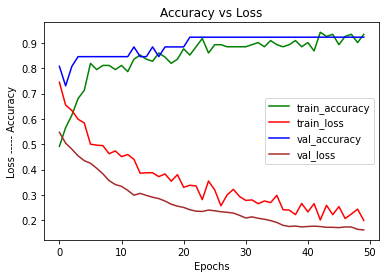

In [115]:
plt.plot(model_history.history['accuracy'], color='g', label='train_accuracy')
plt.plot(model_history.history['loss'], color='r', label='train_loss')
plt.plot(model_history.history['val_accuracy'], color='b', label='val_accuracy')
plt.plot(model_history.history['val_loss'], color='brown', label='val_loss')
plt.legend(loc='upper_left')
plt.title("Accuracy vs Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss ----- Accuracy")

In [147]:
xgbOpt_ypred = xgbOpt.predict(X_test)
adbOpt_ypred = adbOpt.predict(X_test)
catboostOpt_ypred = catboostOpt.predict(X_test)
rfcOpt_ypred = rfcOpt.predict(X_test)
model_pred = model.predict(X_test)

In [148]:
print()
print("Accuracy of XGBoost on Train set is ", xgbOpt.score(X_train, y_train))
print()
print("=================================================================")
print()
print("Accuracy of AdaBoost on Train set is ", adbOpt.score(X_train, y_train))
print()
print("=================================================================")
print()
print("Accuracy of CatBoost on Train set is ", catboostOpt.score(X_train, y_train))
print()
print("=================================================================")
print()
print("Accuracy of Random Forest on Train set is ", rfcOpt.score(X_train, y_train))
print()
print("=================================================================")
print()
print("Accuracy of ANN on Train set is ", grcv_ann.score(X_train, y_train))
print()
print("=================================================================")
print("=================================================================")
print()
print("Accuracy of XGBoost on Test set is ", accuracy_score(y_test, xgbOpt_ypred))
print()
print("=================================================================")
print()
print("Accuracy of AdaBoost on Test set is ", accuracy_score(y_test, adbOpt_ypred))
print()
print("=================================================================")
print()
print("Accuracy of CatBoost on Test set is ", accuracy_score(y_test, catboostOpt_ypred))
print()
print("=================================================================")
print()
print("Accuracy of Random Forest on Test set is ", accuracy_score(y_test, rfcOpt_ypred))
print()
print("=================================================================")
print()
print("Accuracy of ANN on Test set is ", accuracy_score(y_test, grcv_ann.predict(X_test)))
print()


Accuracy of XGBoost on Train set is  0.9918032786885246


Accuracy of AdaBoost on Train set is  1.0


Accuracy of CatBoost on Train set is  0.9672131147540983


Accuracy of Random Forest on Train set is  1.0


Accuracy of ANN on Train set is  0.9918032786885246


Accuracy of XGBoost on Test set is  0.9230769230769231


Accuracy of AdaBoost on Test set is  0.8461538461538461


Accuracy of CatBoost on Test set is  0.9615384615384616


Accuracy of Random Forest on Test set is  0.9615384615384616


Accuracy of ANN on Test set is  0.9230769230769231



## Saving the best model


In [149]:
with open("rfc_hepatitis.pkl","wb") as f5:  #Random Forest
    pickle.dump(rfcOpt, f5)

In [150]:
with open("ctb_hepatitis.pkl","wb") as f7:  #Catboost
    pickle.dump(catboostOpt, f7)

### Note:
- Random Forest performed better than all

----

---

## 4. Interpret and Evaluate

- Lime
- eli5

In [167]:
"""
Lets evaluate the model using visualization of Lime and eli5
"""
from lime import lime_tabular
import eli5

In [168]:
# First create lime explainer
features_names = data_out_comb.columns.to_list()
features_names.remove("class")
classes_names=["Die", "Live"]
len(features_names)

11

In [169]:
lexplainer = lime_tabular.LimeTabularExplainer(X_train.values, feature_names=features_names, class_names=classes_names, discretize_continuous=True)

In [170]:
"""
Taking a row of X_test for prediction
"""
rfcOpt.predict(np.array(X_test.iloc[21]).reshape(1,-1))

array([0], dtype=int64)

In [172]:
rfcOpt.predict_proba(np.array(X_test.iloc[21]).reshape(1,-1))

array([[0.61669444, 0.38330556]])

In [173]:
exp = lexplainer.explain_instance(data_row= X_test.iloc[1],predict_fn = rfcOpt.predict_proba, num_features=14, top_labels=1)

In [174]:
exp.show_in_notebook(show_table=True, show_all=False)

---

In [175]:
"""
Since eli5 does not support Catboost, we are using Random Forest
"""
eli5.show_prediction(rfcOpt, X_test.iloc[1],top=11,feature_names=features_names, target_names = classes_names)

---

---

## 5. Confusion Metrics

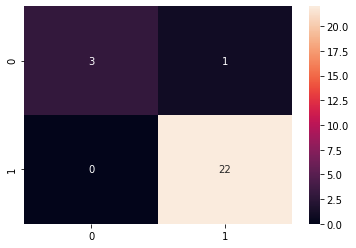

In [176]:
"""
We will only do confusion metrics of Random Forest
"""
rfc_pred = rfcOpt.predict(X_test)
cm = confusion_matrix(y_test, rfc_pred)
sns.heatmap(cm, annot=True)

In [177]:
cr = classification_report(y_test, rfcOpt_ypred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.96      1.00      0.98        22

    accuracy                           0.96        26
   macro avg       0.98      0.88      0.92        26
weighted avg       0.96      0.96      0.96        26



## Conclusion:
- Random Forest performed better
- Production is done using app.py file
- Deployment is done using Heroku